### Colonnes


    SalePrice - le prix de vente du bien en dollars. Il s'agit de la variable cible que vous essayez de prédire.
    MSSubClass : La classe du bâtiment
    MSZoning : Classification générale du zonage
    LotFrontage : Pieds linéaires de la rue reliée à la propriété
    LotArea : Taille du lot en pieds carrés
    Street (rue) : Type d'accès routier
    Alley (allée) : Type d'accès à l'allée
    Forme du terrain : Forme générale de la propriété
    LandContour : Planéité du terrain
    Utilities (services publics) : Type de services publics disponibles
    LotConfig : Configuration du terrain
    LandSlope : Slope of property (pente de la propriété)
    Neighborhood : Emplacements physiques dans les limites de la ville d'Ames
    Condition1 : Proximité d'une route principale ou d'une voie ferrée
    Condition2 : Proximité de la route principale ou de la voie ferrée (si une seconde est présente)
    BldgType : Type de logement
    HouseStyle : Style de l'habitation
    OverallQual : Qualité générale des matériaux et des finitions
    OverallCond : Évaluation de l'état général
    Année de construction : Date de construction initiale
    YearRemodAdd : Date de rénovation
    RoofStyle : Type de toit
    RoofMatl : Matériau du toit
    Exterior1st : Revêtement extérieur de la maison
    Exterior2nd : Revêtement extérieur de la maison (si plus d'un matériau)
    MasVnrType : Type de placage de maçonnerie
    MasVnrArea : Surface du placage de maçonnerie en pieds carrés
    ExterQual : Qualité du matériau extérieur
    ExterCond : État actuel du matériau à l'extérieur
    Fondation : Type de fondation
    BsmtQual : Hauteur du sous-sol
    BsmtCond : État général du sous-sol
    BsmtExposure : Murs du sous-sol en rez-de-chaussée ou en rez-de-jardin
    BsmtFinType1 : Qualité de la surface finie du sous-sol
    BsmtFinSF1 : Pieds carrés finis de type 1
    BsmtFinType2 : Qualité de la deuxième surface finie (si présente)
    BsmtFinSF2 : Pieds carrés finis de type 2
    BsmtUnfSF : Pieds carrés non finis de la surface du sous-sol
    TotalBsmtSF : Total des pieds carrés de la surface du sous-sol
    Chauffage : Type de chauffage
    ChauffageQC : Qualité et état du chauffage
    CentralAir : Climatisation centrale
    Electrical : Système électrique
    1stFlrSF : Pieds carrés du premier étage
    2ndFlrSF : Pieds carrés du deuxième étage
    LowQualFinSF : Pieds carrés finis de qualité inférieure (tous les étages)
    GrLivArea : Surface habitable au-dessus du niveau du sol en pieds carrés
    BsmtFullBath : Salle de bain complète du sous-sol
    BsmtHalfBath : BsmtHalfBath : Salle de bain complète au sous-sol
    FullBath : Salles de bain complètes au-dessus du niveau du sol
    HalfBath : Demi-bains : Demi-salles de bains au-dessus du niveau du sol
    Chambre à coucher : Nombre de chambres à coucher au-dessus du niveau du sous-sol
    Cuisine : Nombre de cuisines : Nombre de cuisines
    CuisineQual : Qualité de la cuisine
    TotRmsAbvGrd : Nombre total de pièces au-dessus du niveau du sol (ne comprend pas les salles de bains)
    Fonctionnel : évaluation de la fonctionnalité de la maison
    Foyers : Nombre de cheminées
    FireplaceQu : Qualité de la cheminée
    GarageType : Emplacement du garage
    GarageYrBlt : Année de construction du garage
    GarageFinish : Finition intérieure du garage
    GarageCars : Taille du garage en nombre de voitures
    GarageArea : Taille du garage en pieds carrés
    GarageQual : Qualité du garage
    GarageCond : État du garage
    PavedDrive : Allée pavée : Allée pavée
    WoodDeckSF : Surface de la terrasse en bois en pieds carrés
    OpenPorchSF : Surface du porche ouvert en pieds carrés
    EnclosedPorch : Surface du porche fermé en pieds carrés
    3SsnPorch : Surface du porche trois saisons en mètres carrés
    ScreenPorch : Surface du porche en pieds carrés
    PoolArea : Surface de la piscine en mètres carrés
    PoolQC : Qualité de la piscine
    Fence : Qualité de la clôture
    MiscFeature : Caractéristique diverse non couverte par d'autres catégories
    MiscVal : Valeur en dollars d'une caractéristique diverse
    MoSold : Mois vendu
    YrSold : Année de vente
    SaleType : Type de vente
    SaleCondition : Condition de vente

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import torch



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Reproducibilité
def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    return seed

SEED = set_seed(42)

# Chargement des données et Visualisation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/house.csv")
df.drop(columns=['Id'], inplace=True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
print("\nVérification des valeurs manquantes :")
valeur_manquantes = df.isnull().sum()

valeur_manquantes = valeur_manquantes[valeur_manquantes > 0].sort_values(ascending=False)
print(valeur_manquantes)

print("\nColonnes numériques et catégorielles :")
colonne_numerique = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
colonne_categorielle = df.select_dtypes(include=["object"]).columns.tolist()
print("Numériques :", len(colonne_numerique), "| Catégorielles :", len(colonne_categorielle))


Vérification des valeurs manquantes :
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

Colonnes numériques et catégorielles :
Numériques : 37 | Catégorielles : 43


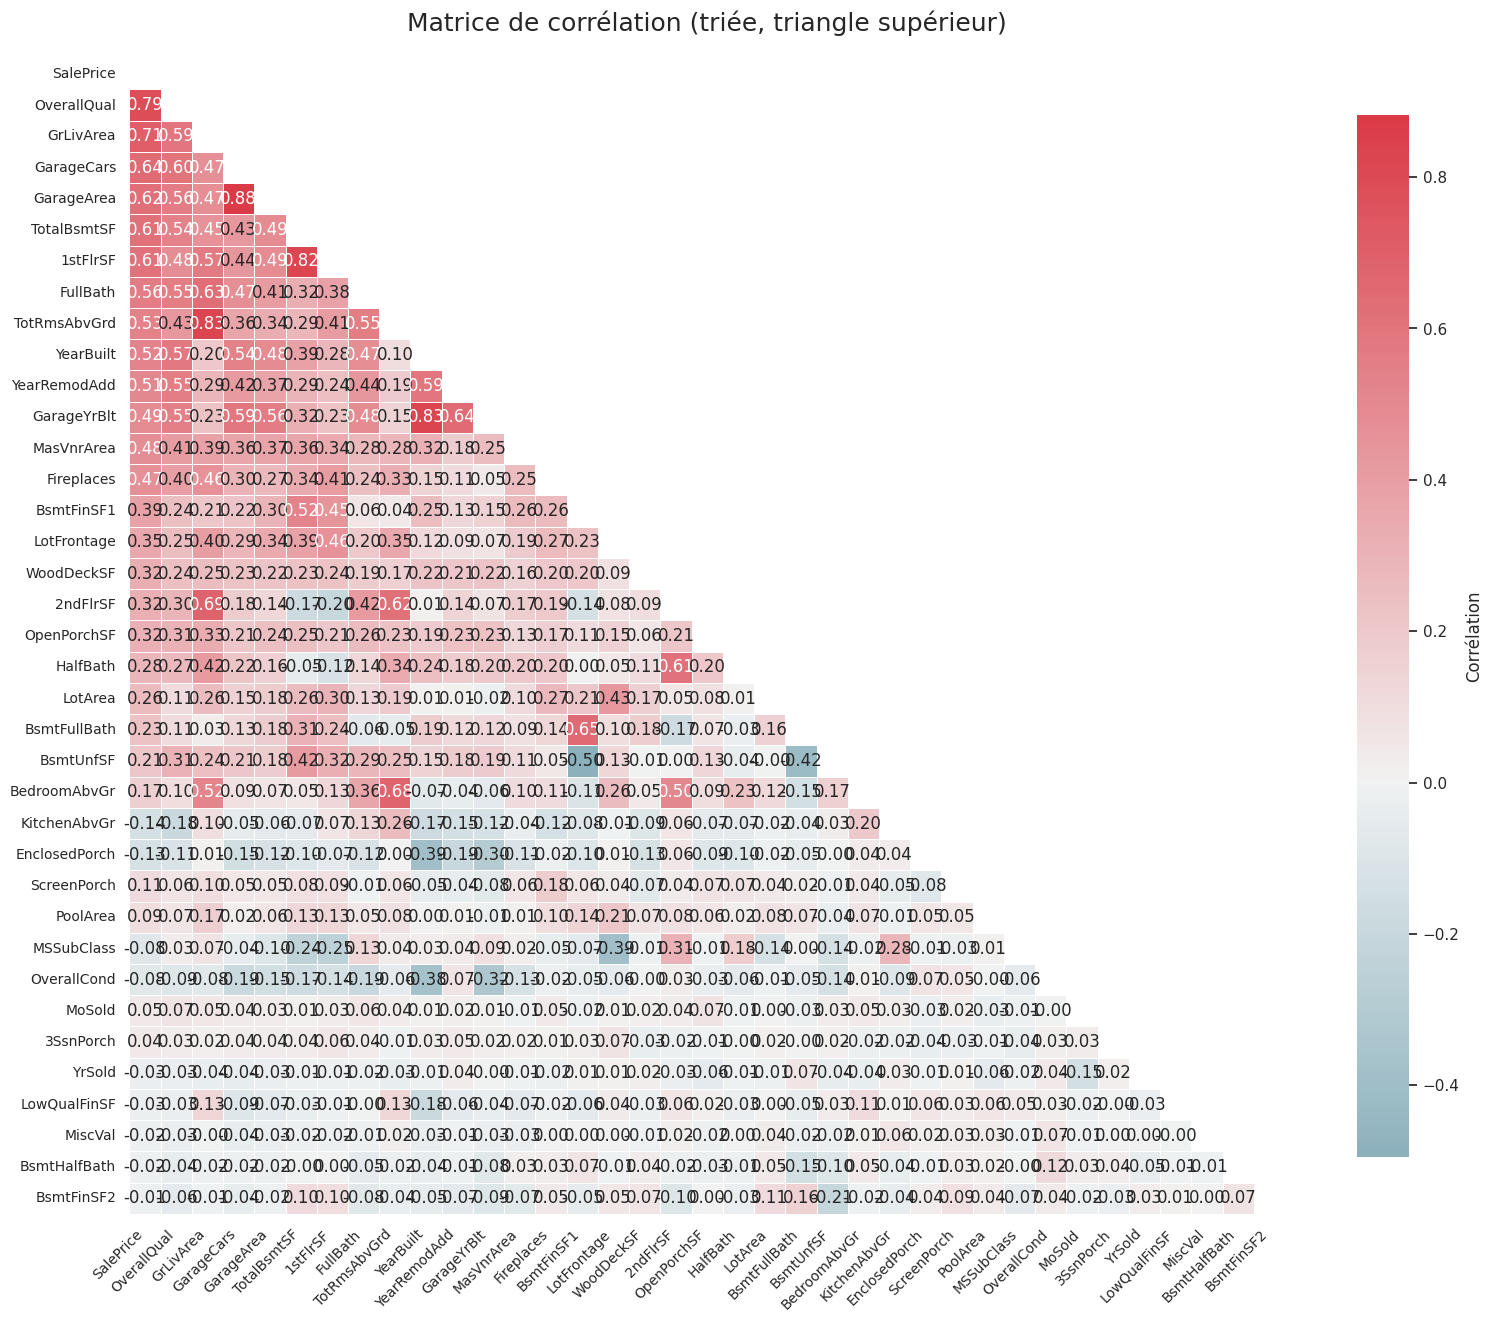

In [ ]:
# Calcul de la matrice de corrélation
corr_matrix = df.corr(numeric_only=True)

# Tri des variables selon leur corrélation avec 'SalePrice' (ou une autre cible)
target = 'SalePrice'
sorted_vars = corr_matrix[target].abs().sort_values(ascending=False).index
corr_sorted = corr_matrix.loc[sorted_vars, sorted_vars]

# Masque pour ne garder que le triangle supérieur
mask = np.triu(np.ones_like(corr_sorted, dtype=bool))

# Taille et style
plt.figure(figsize=(16, 14))
sns.set(style="white")

# Palette douce et centrée sur 0
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Heatmap
sns.heatmap(
    corr_sorted,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Corrélation"}
)

# Titre et mise en page
plt.title("Matrice de corrélation (triée, triangle supérieur)", fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Nous pouvons observer que certaines variables numériques ont une forte corrélation avec SalePrice telles que OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea

In [ ]:
colonne_categorielle

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
#  on essaie de trouver les caracteristique categorielle qui impacte le saleprice
colonne_categorielle_importante = []
for col in colonne_categorielle:
    moyenne_saleprice_par_categorie = df.groupby(col)['SalePrice'].mean().sort_values(ascending=False)
    colonne_categorielle_importante.append((col, moyenne_saleprice_par_categorie))

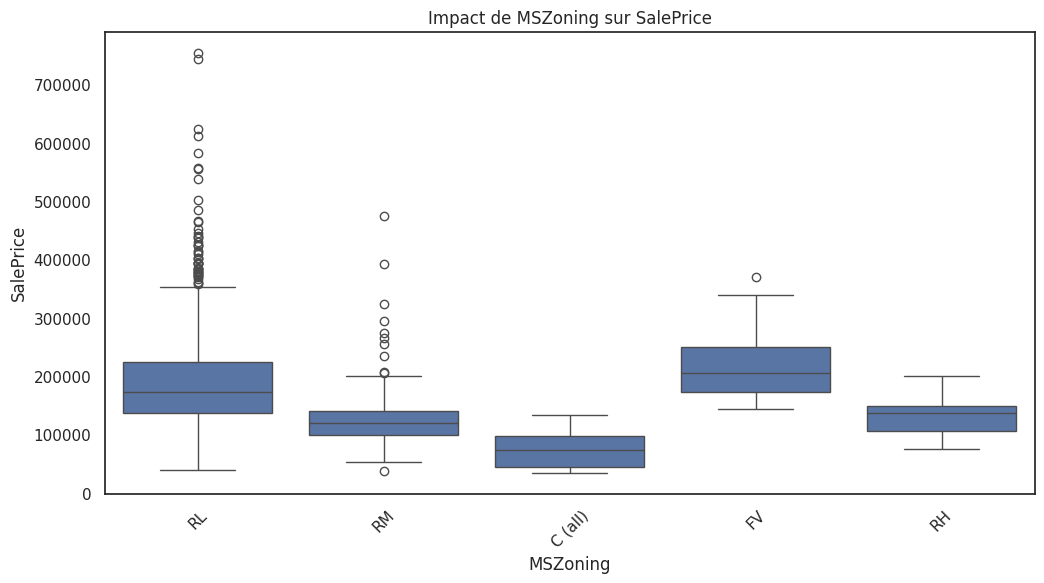

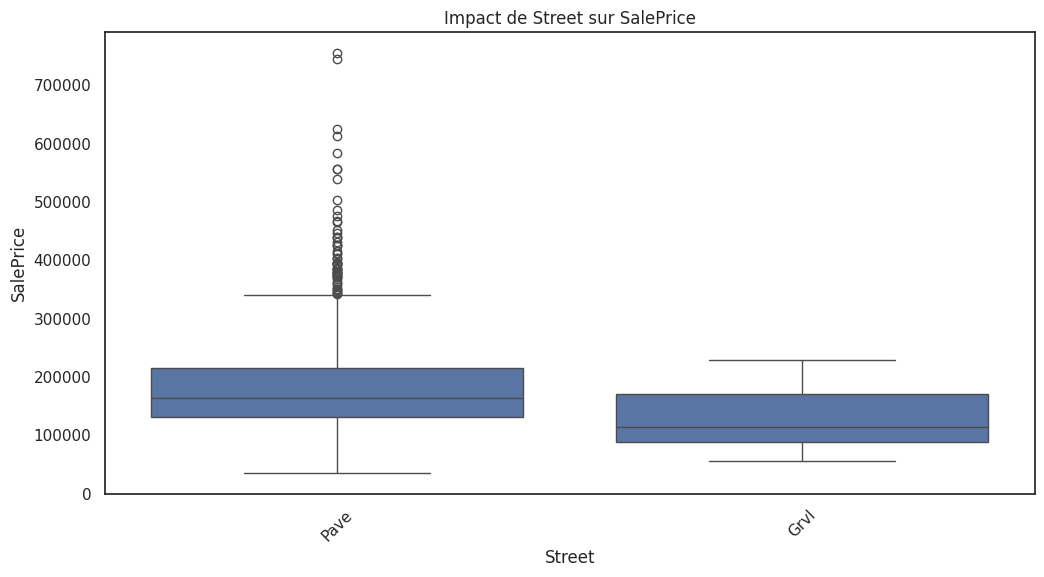

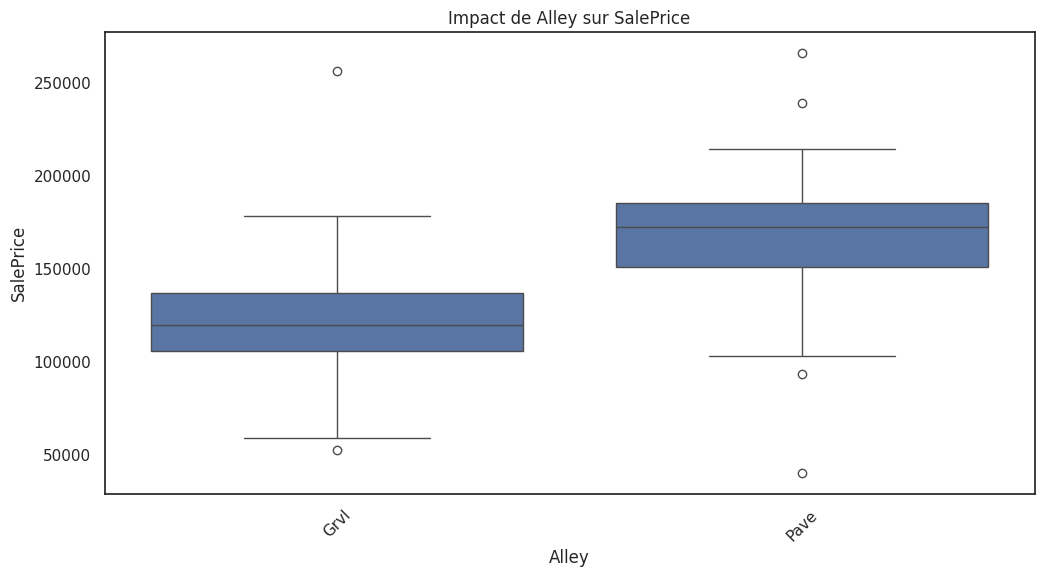

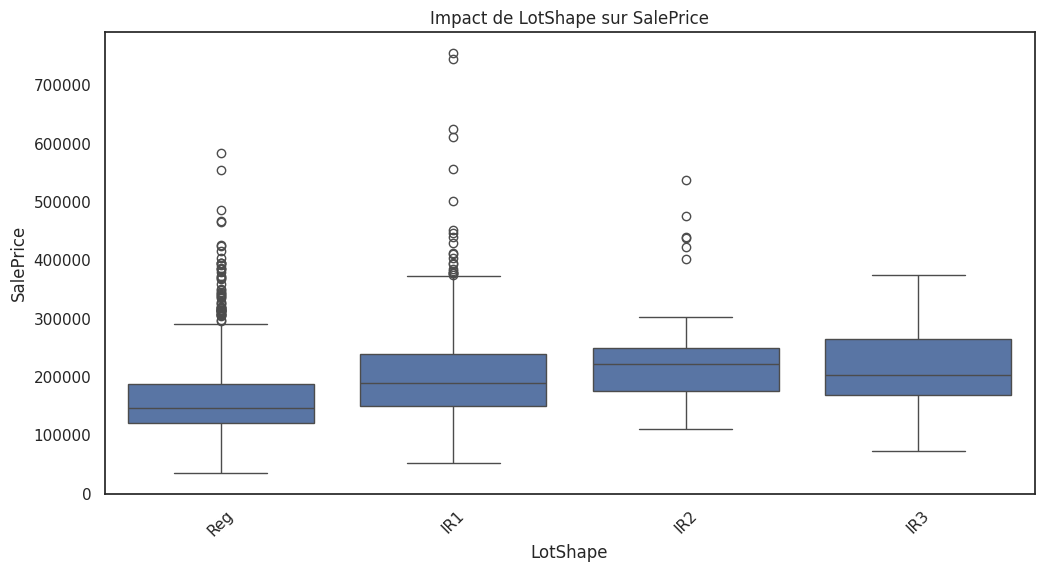

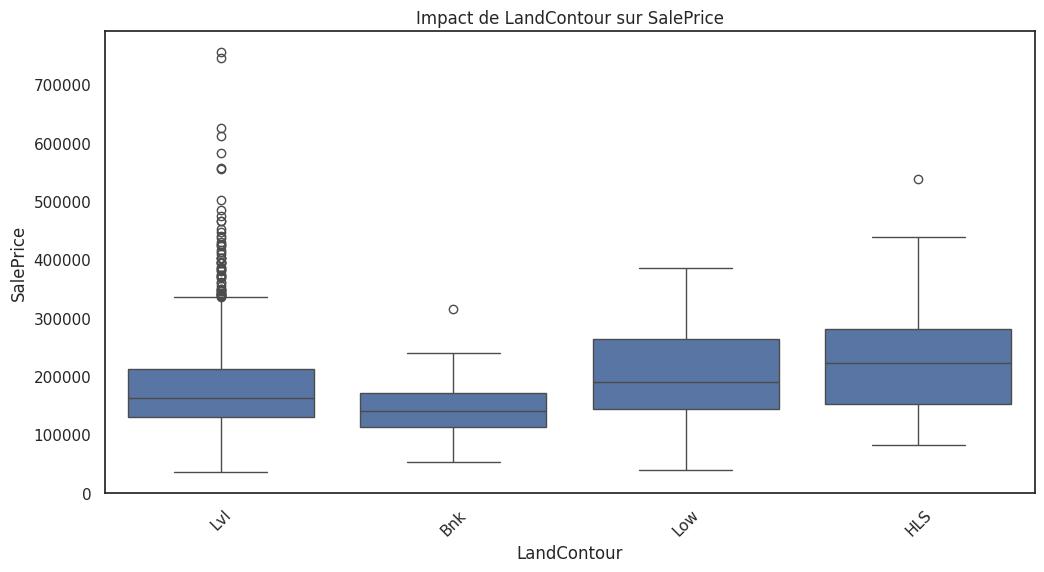

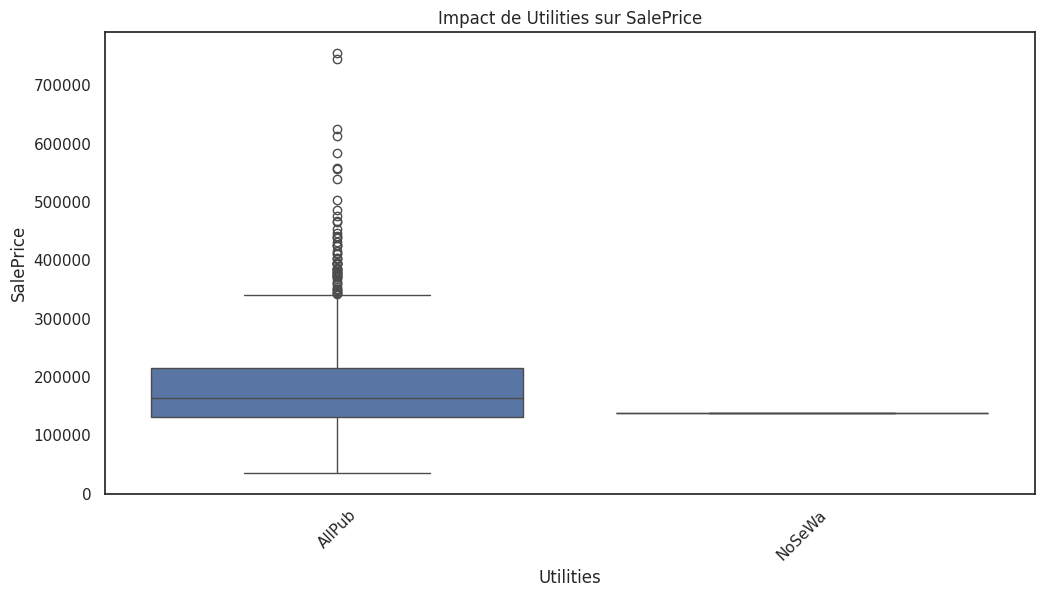

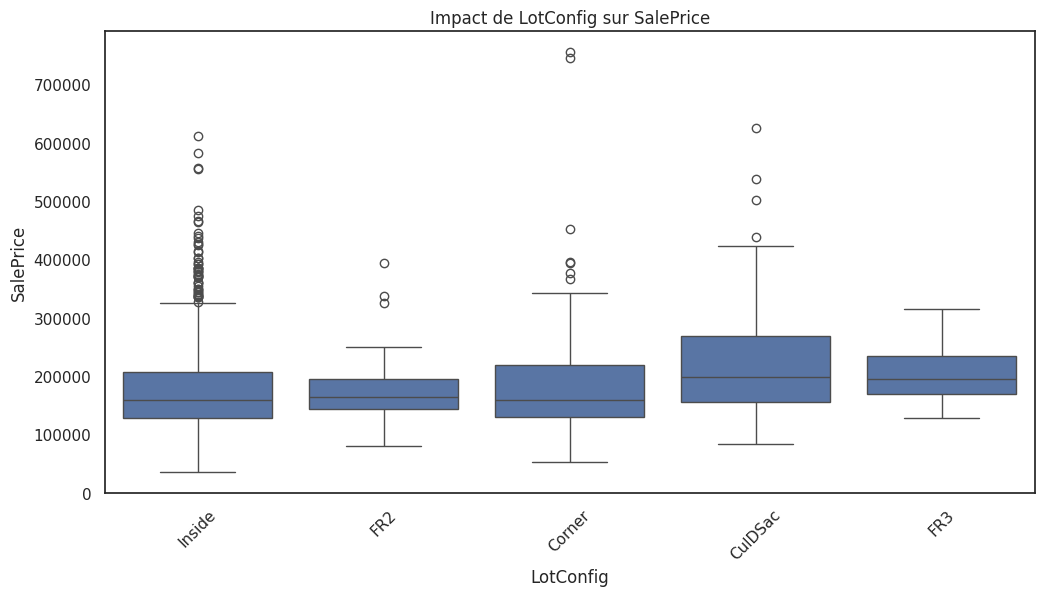

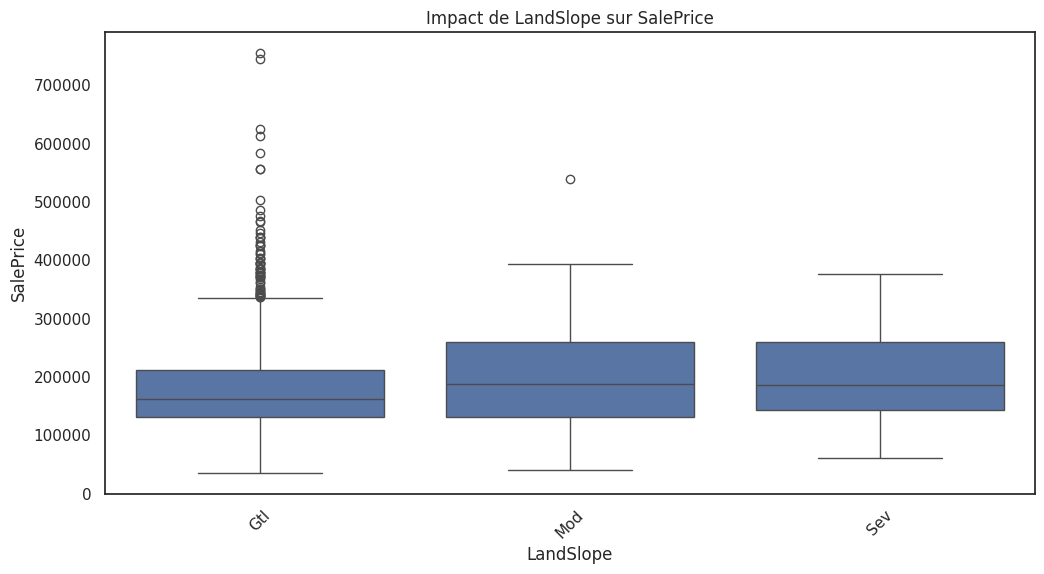

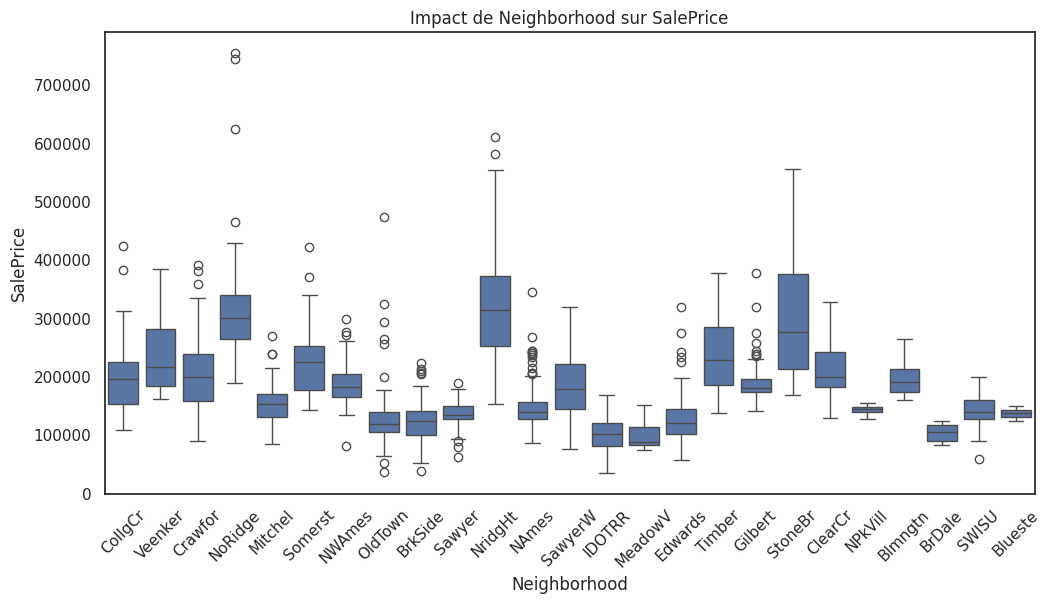

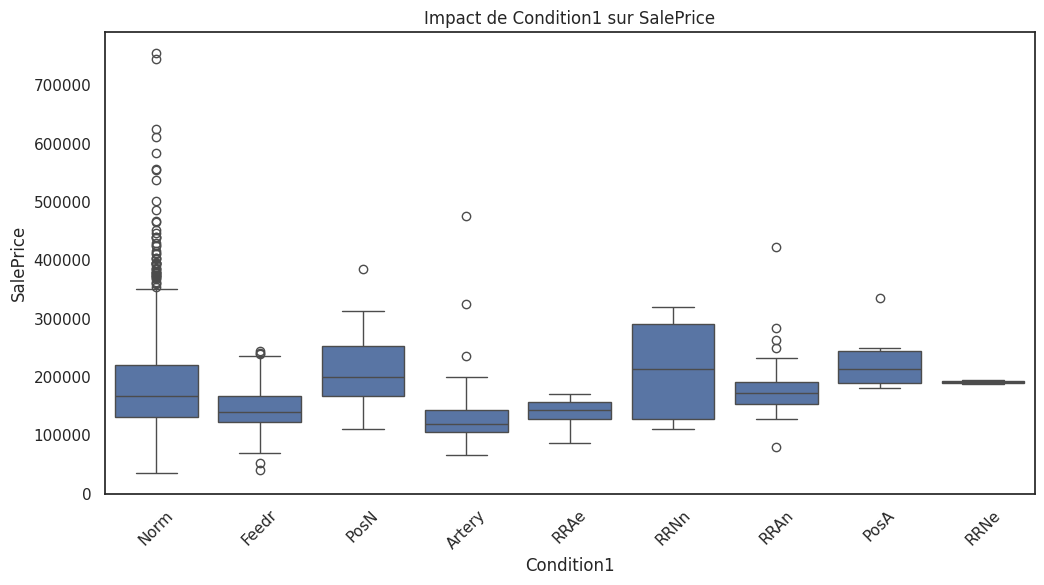

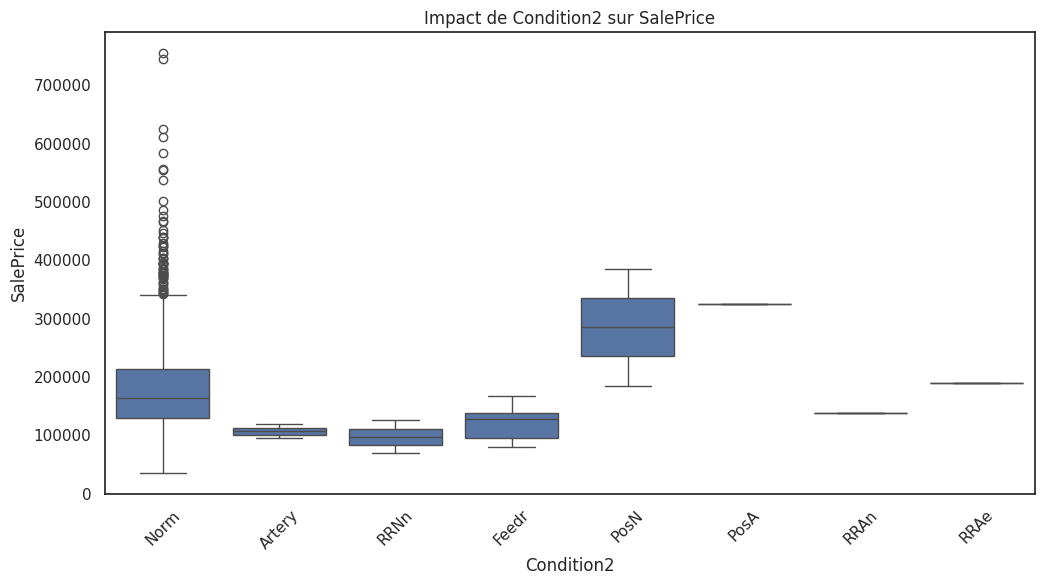

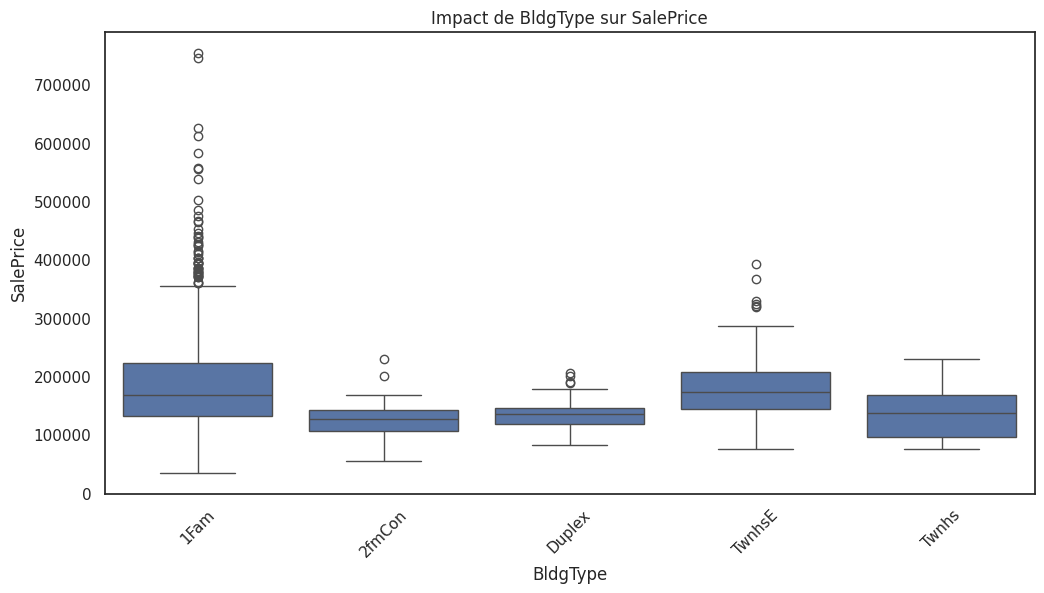

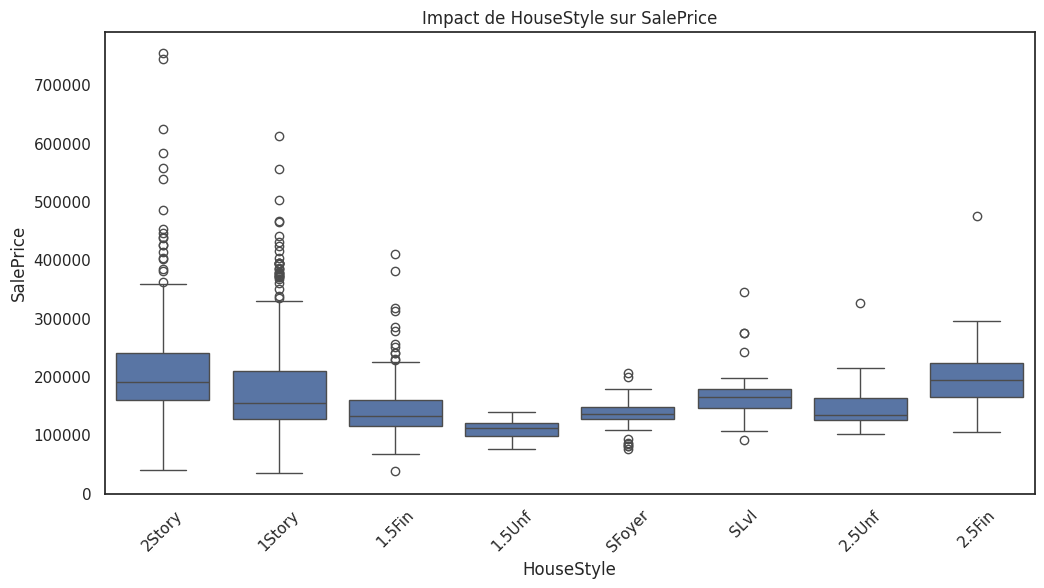

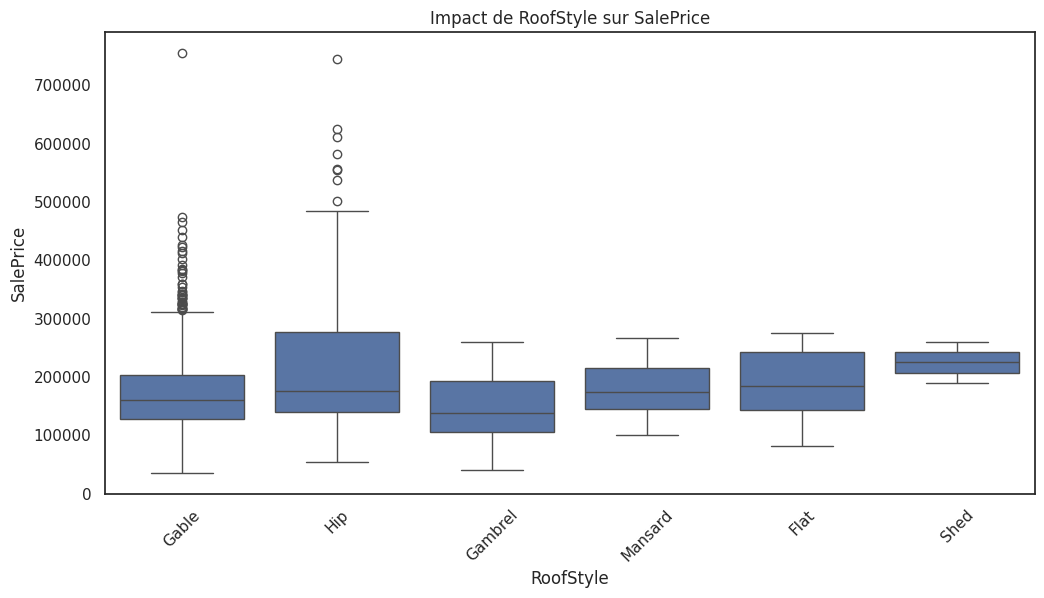

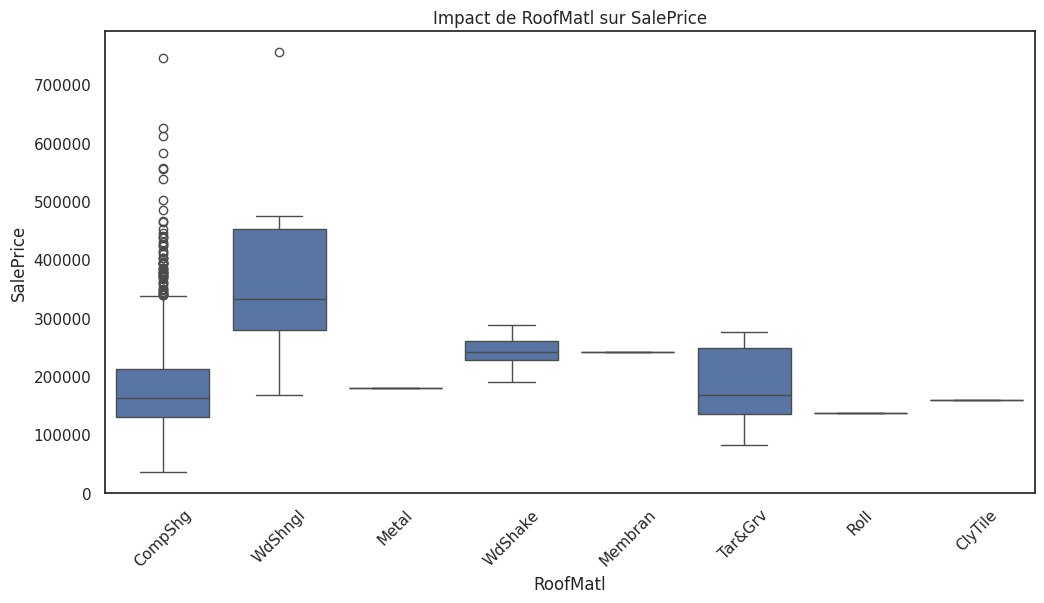

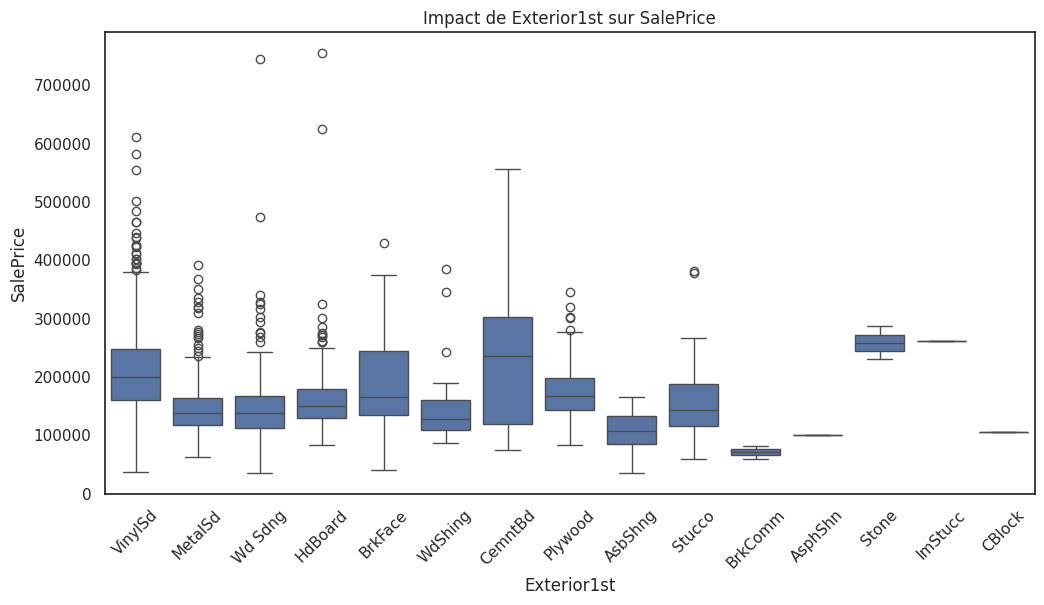

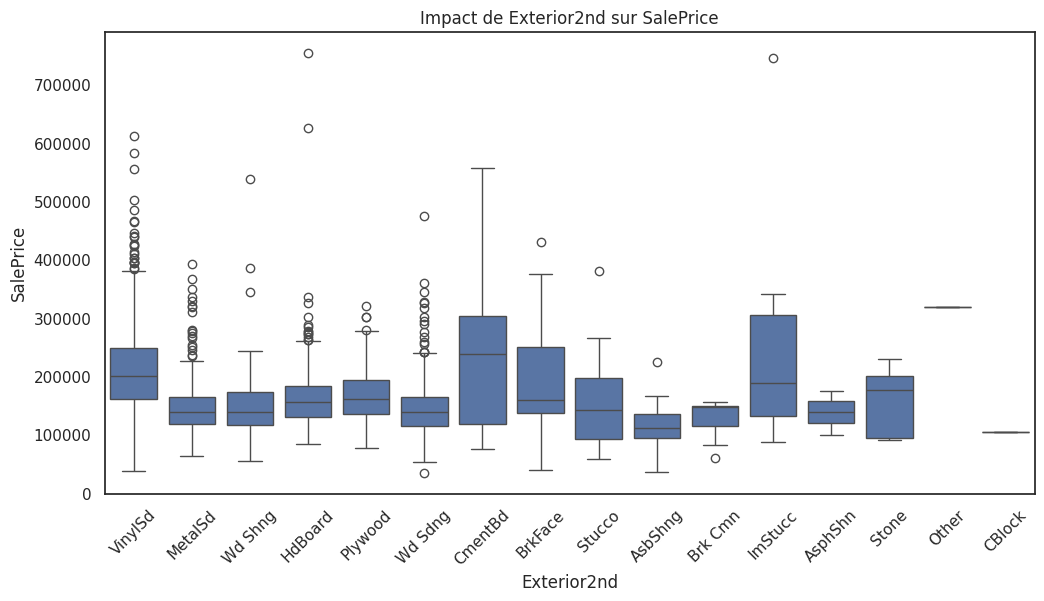

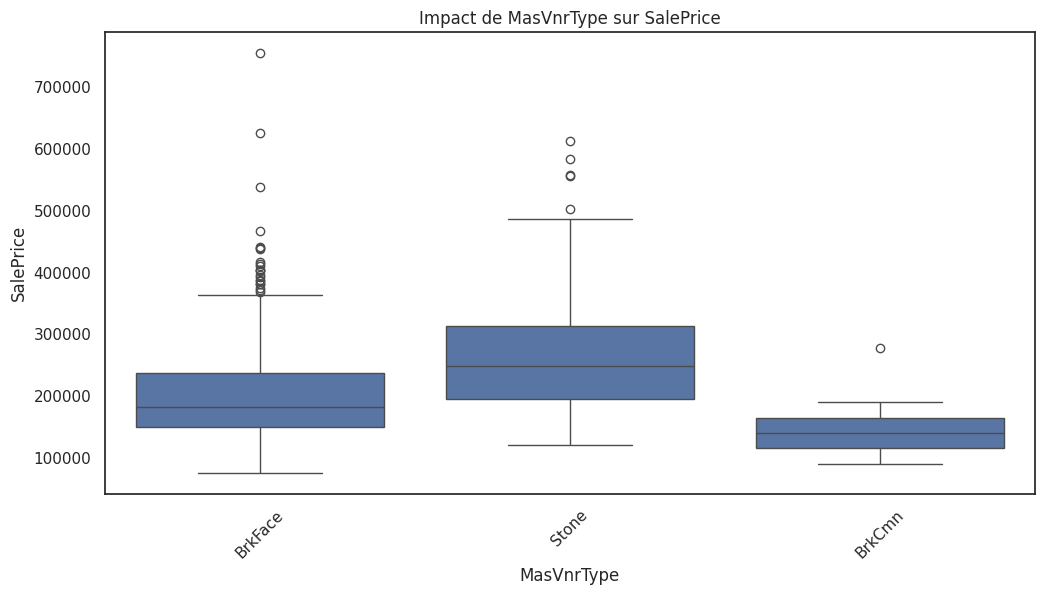

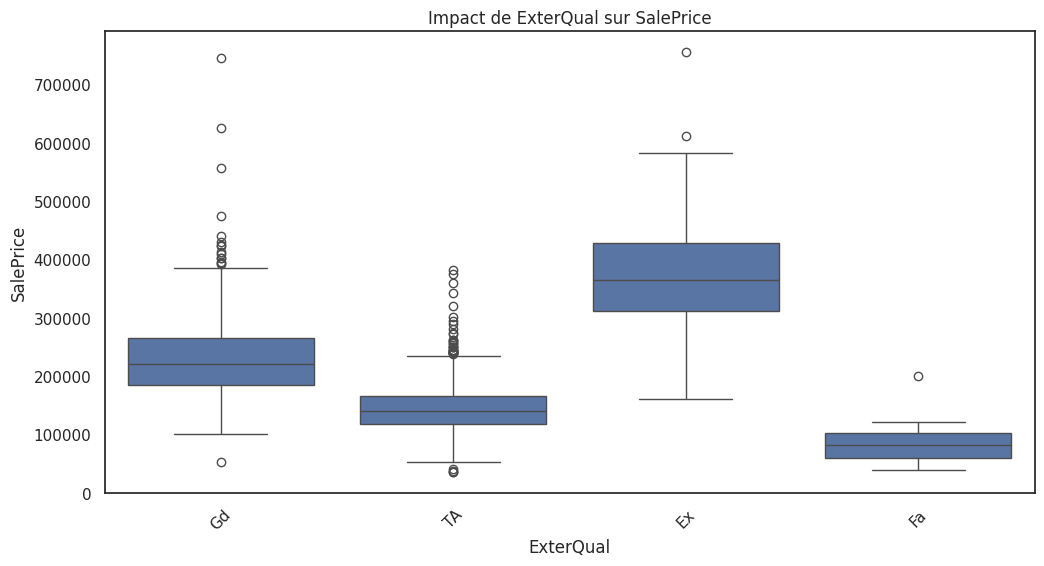

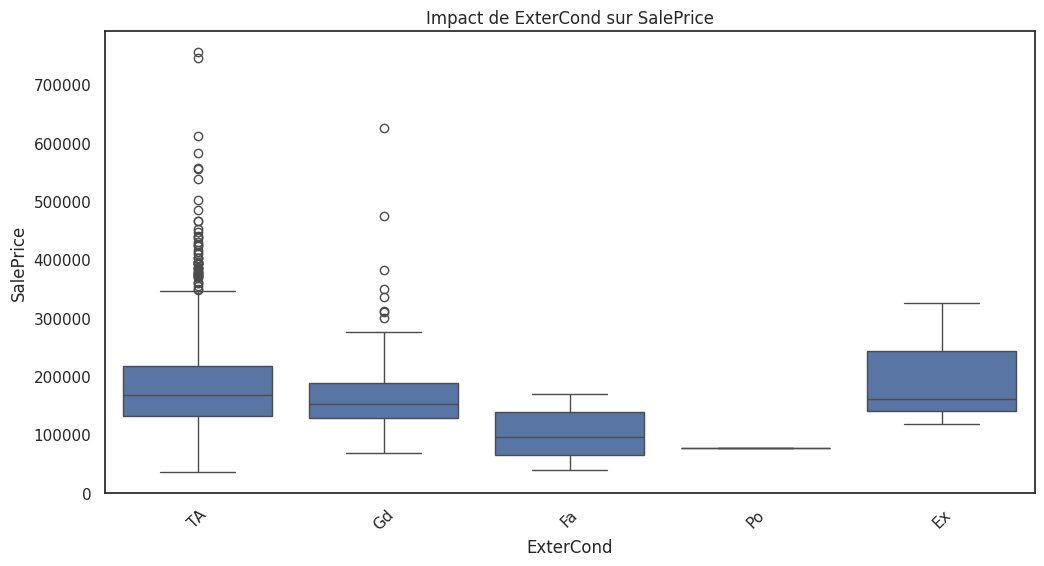

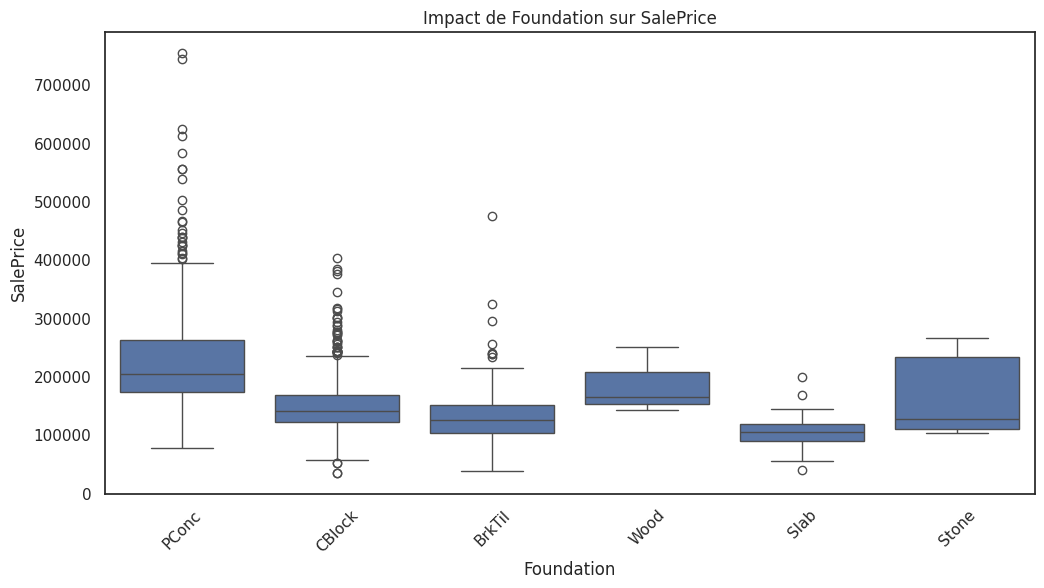

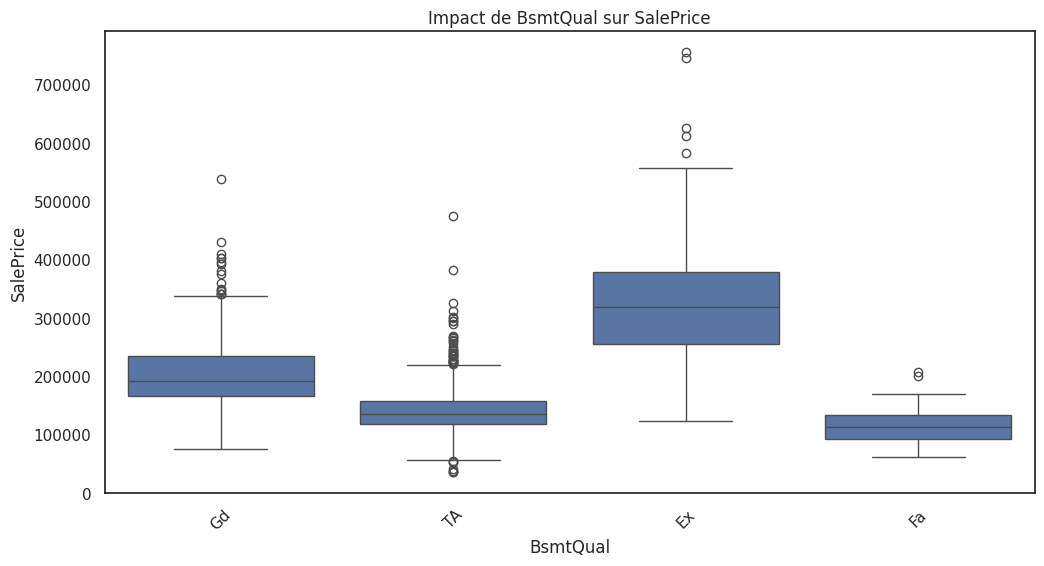

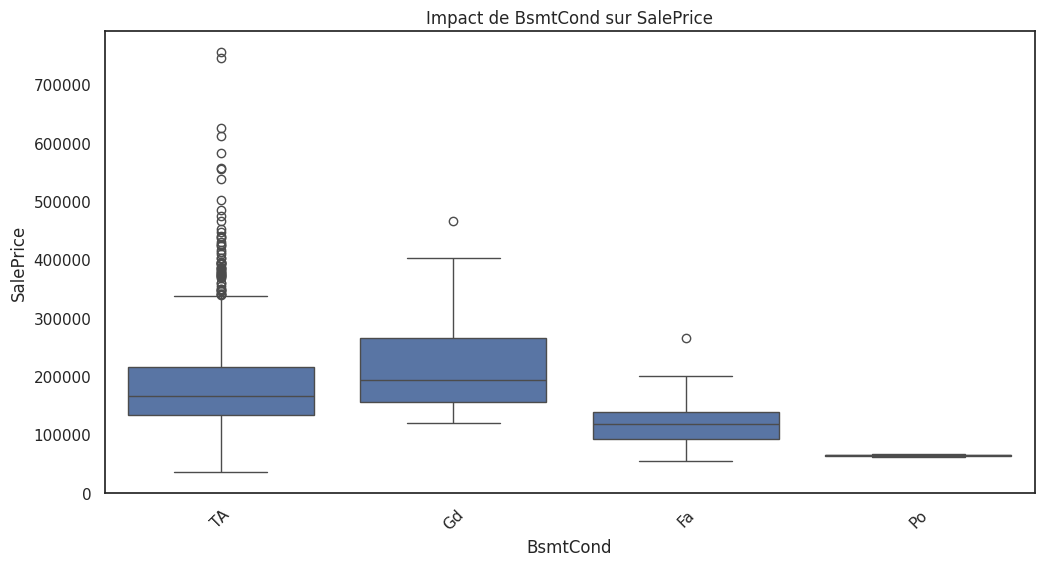

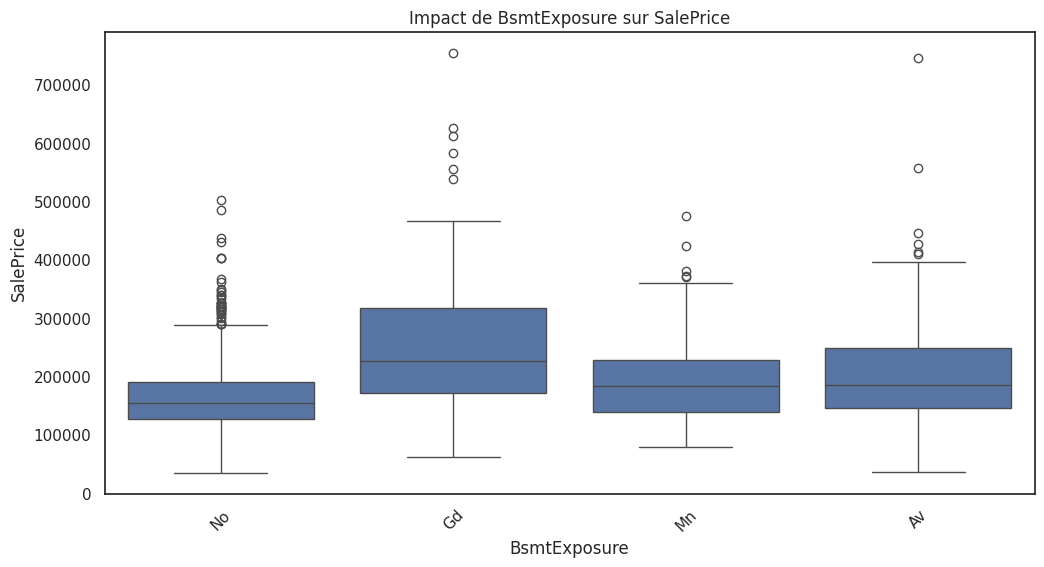

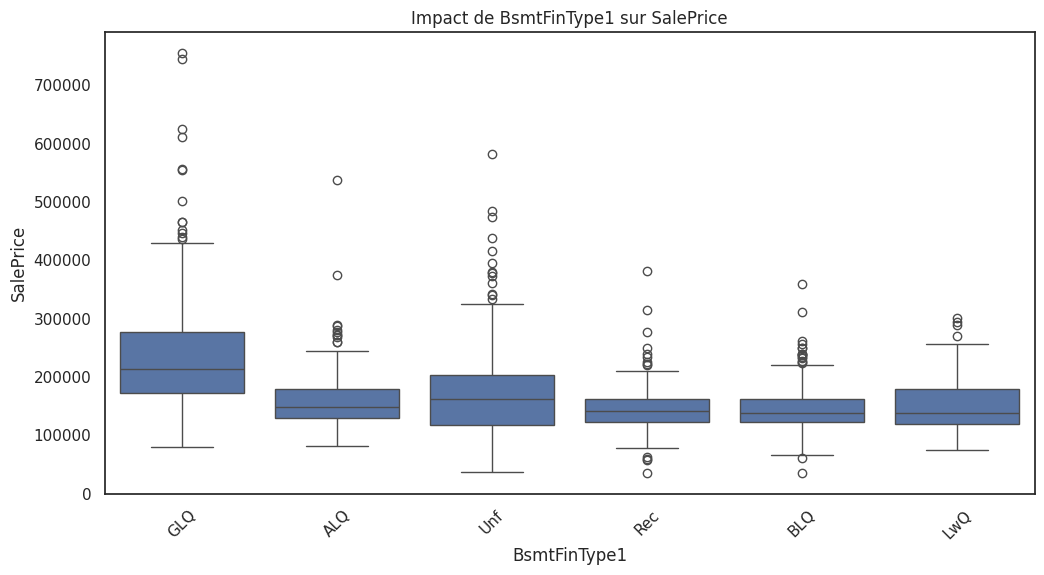

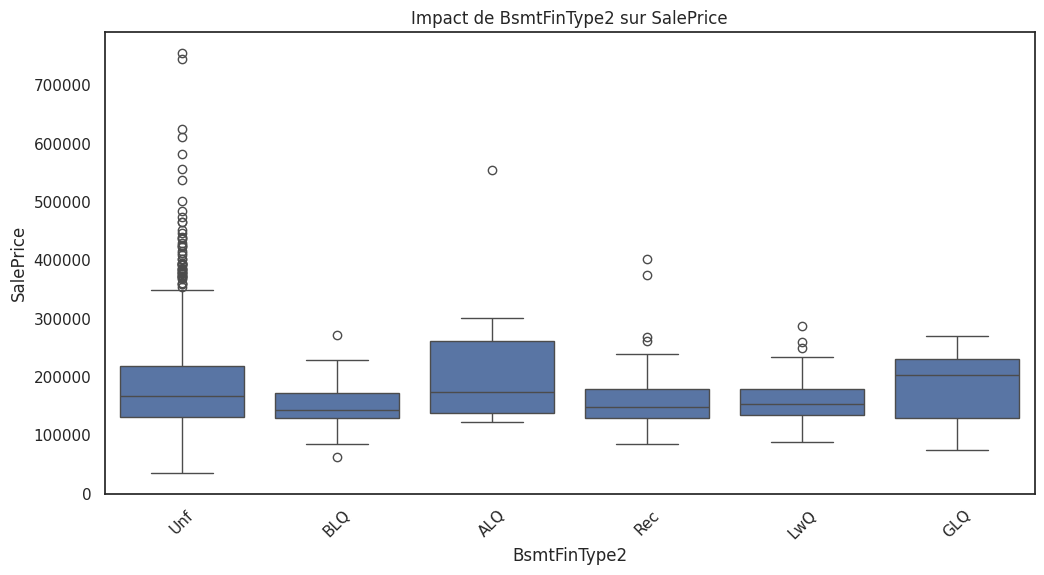

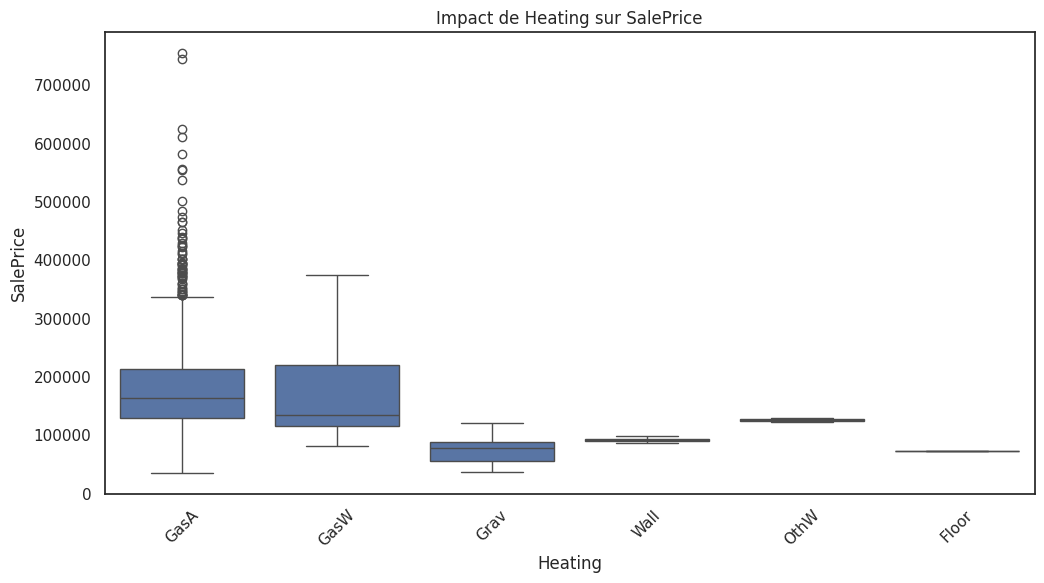

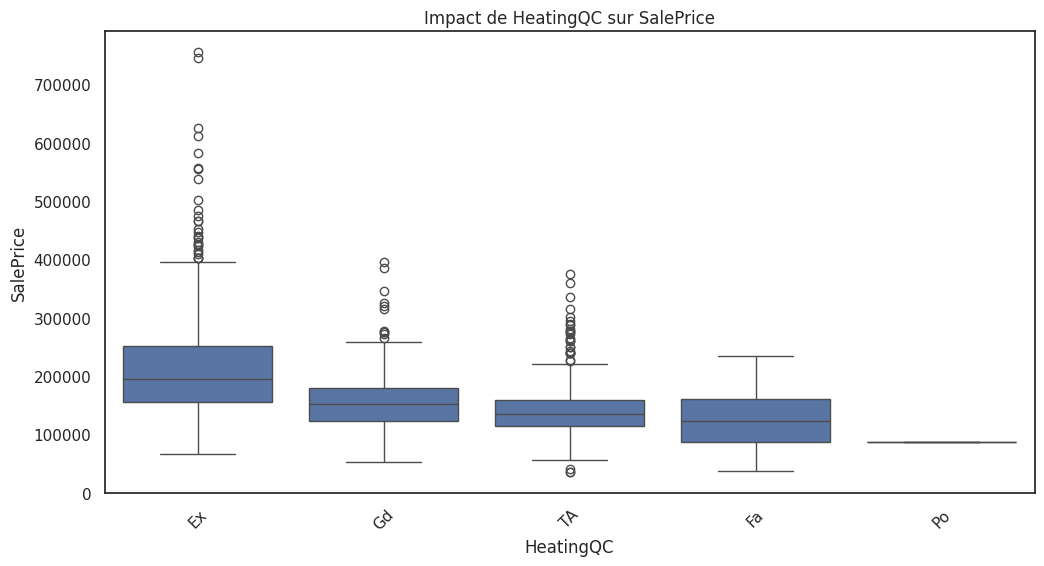

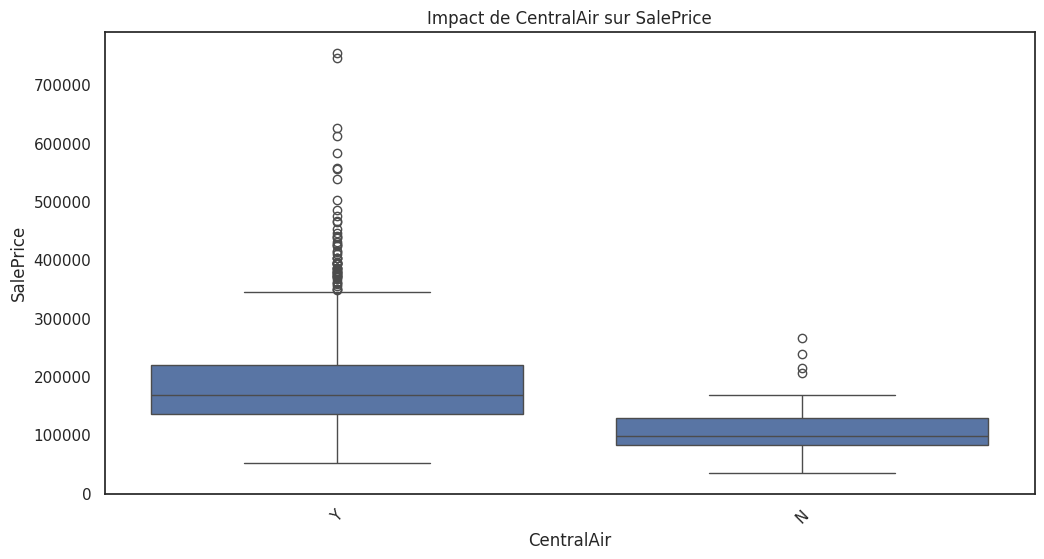

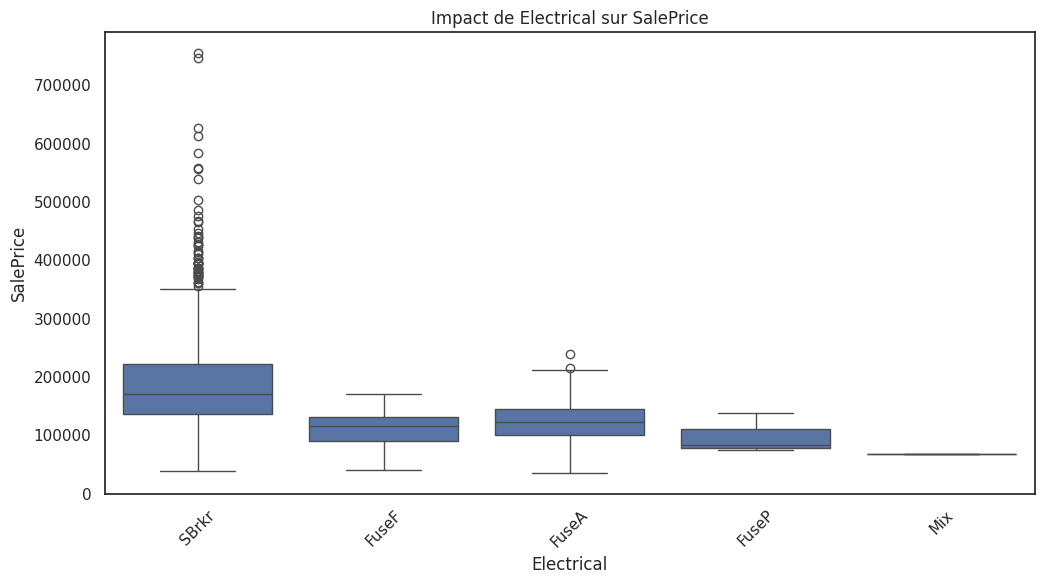

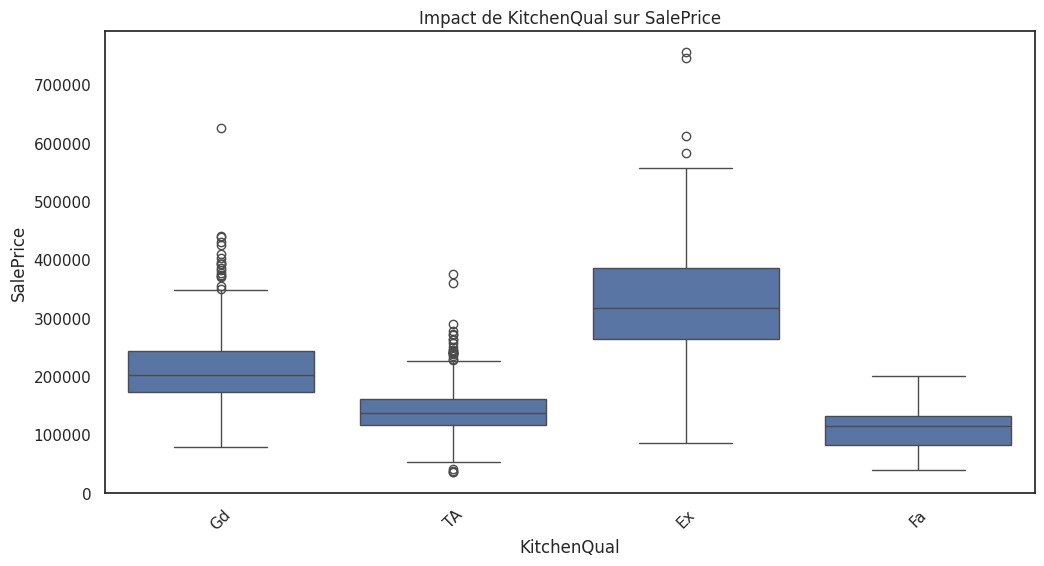

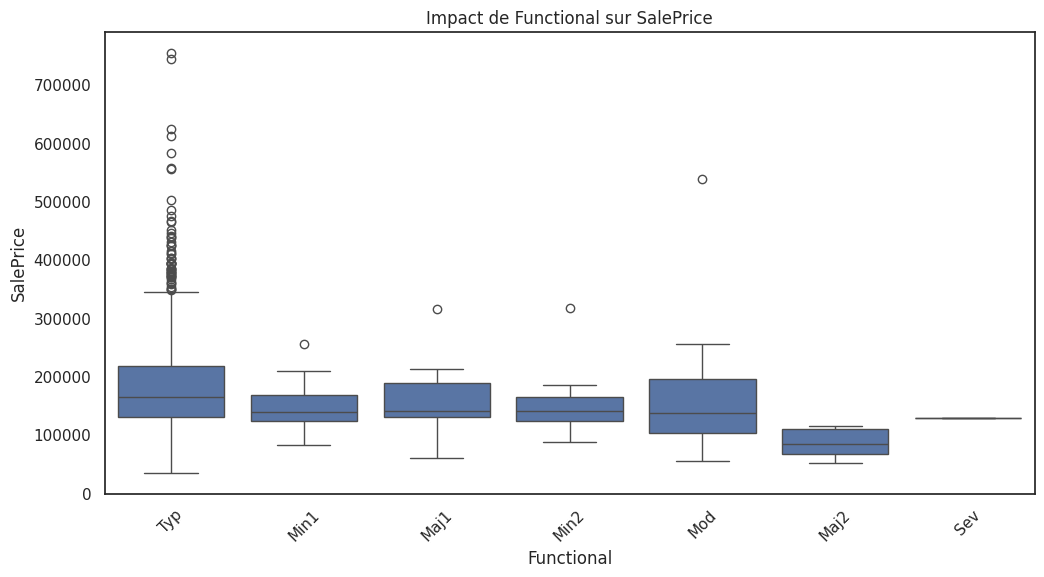

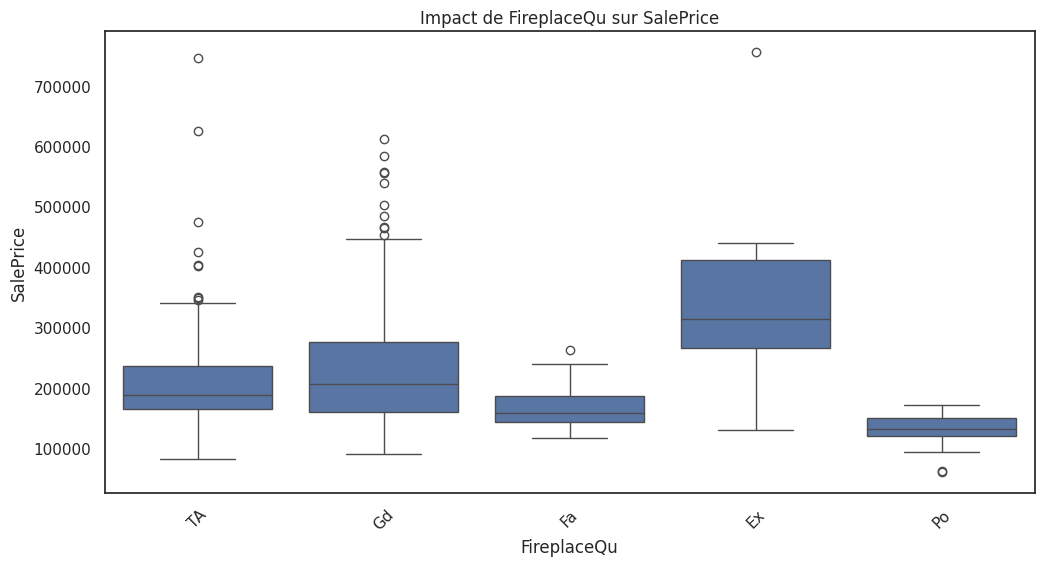

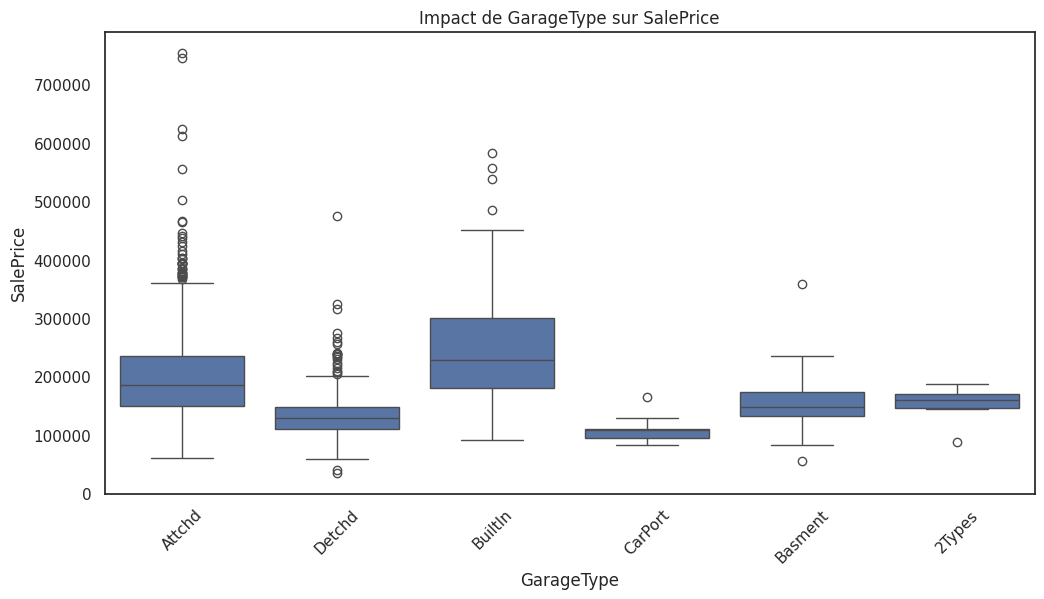

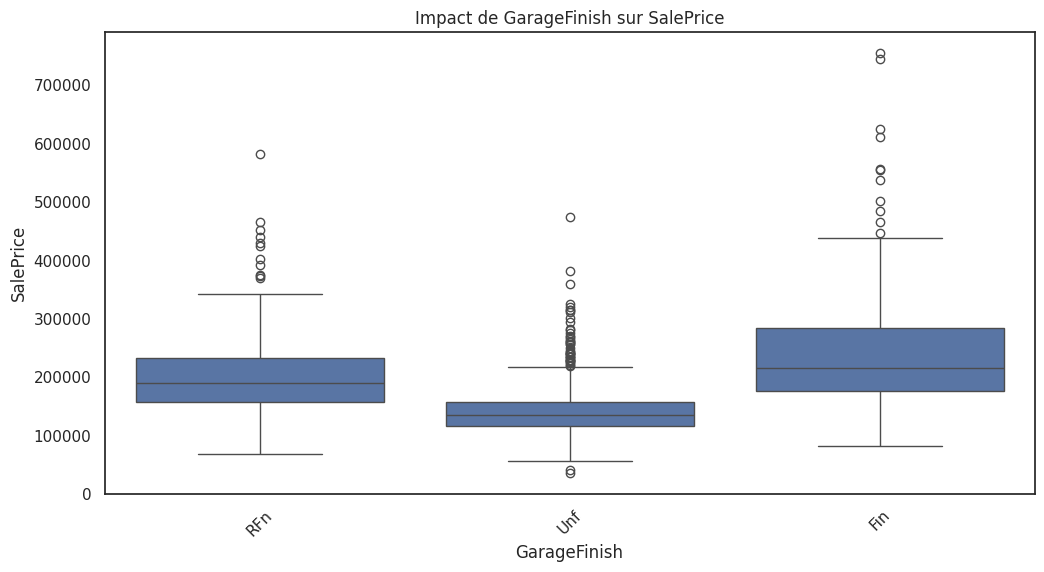

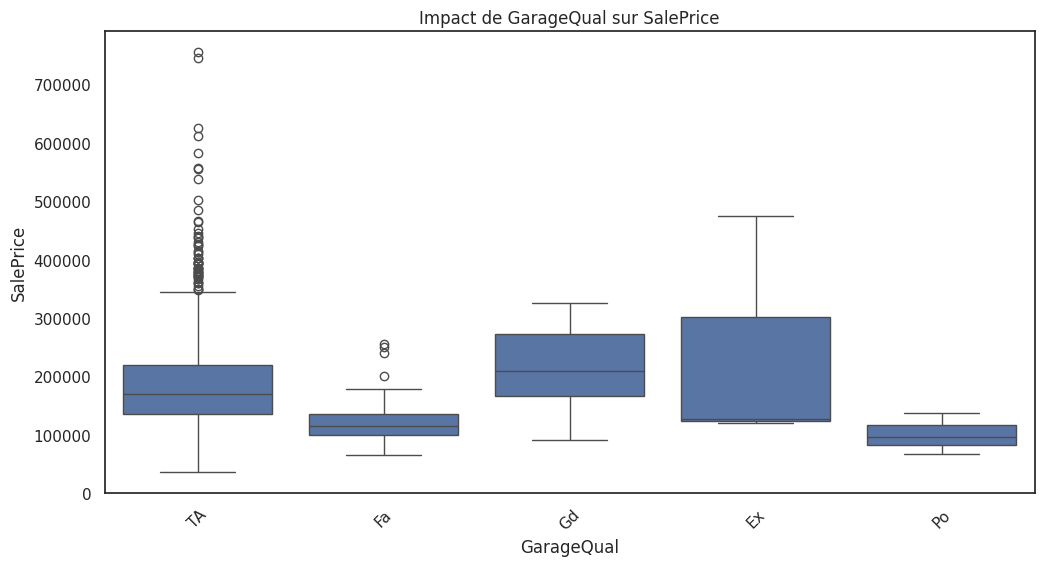

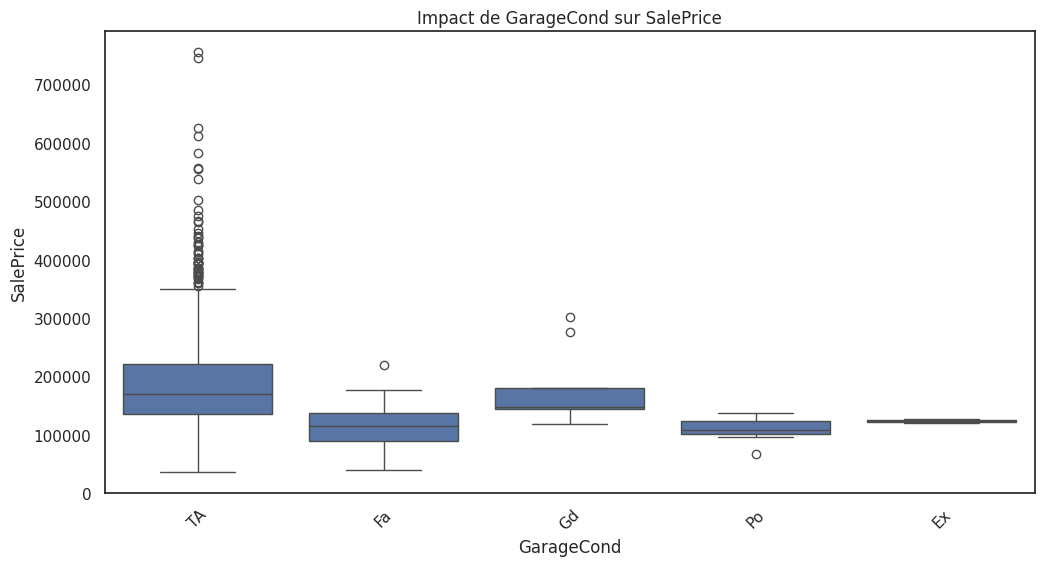

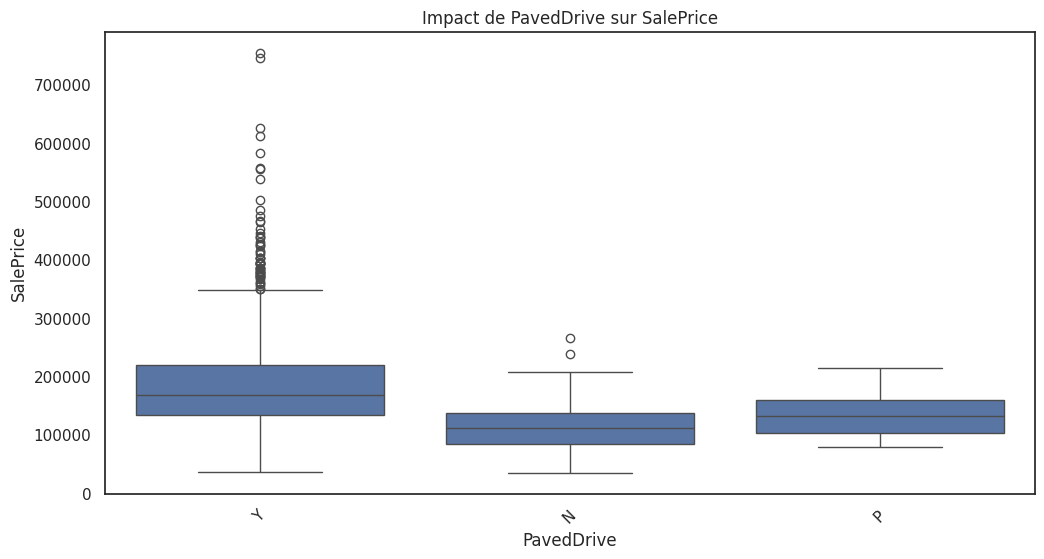

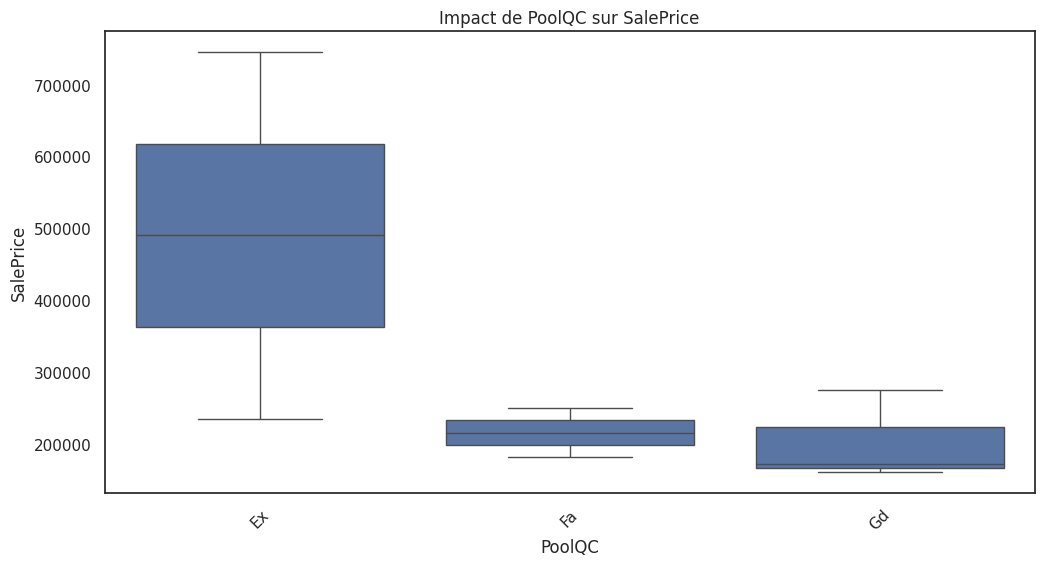

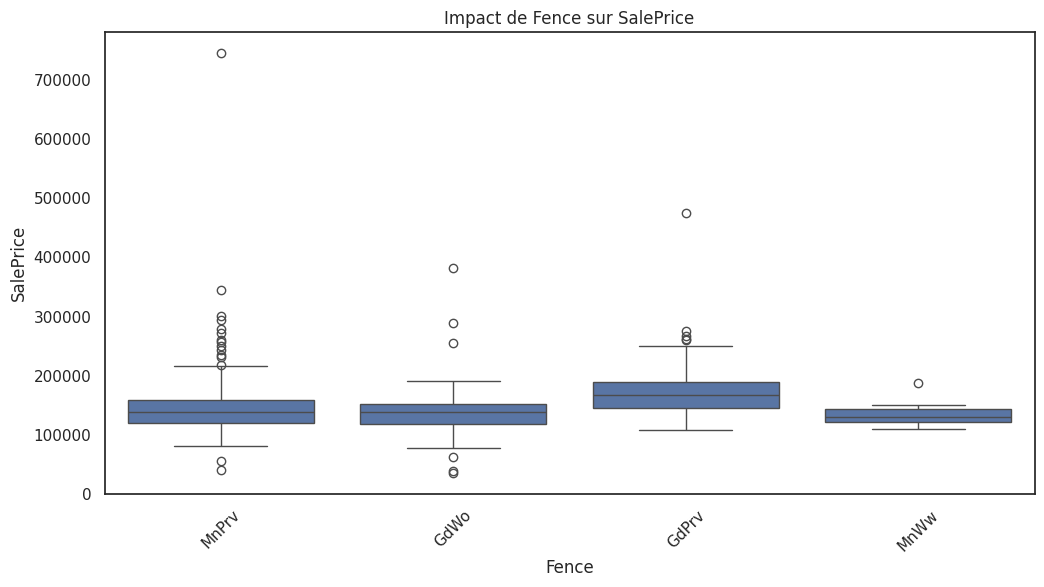

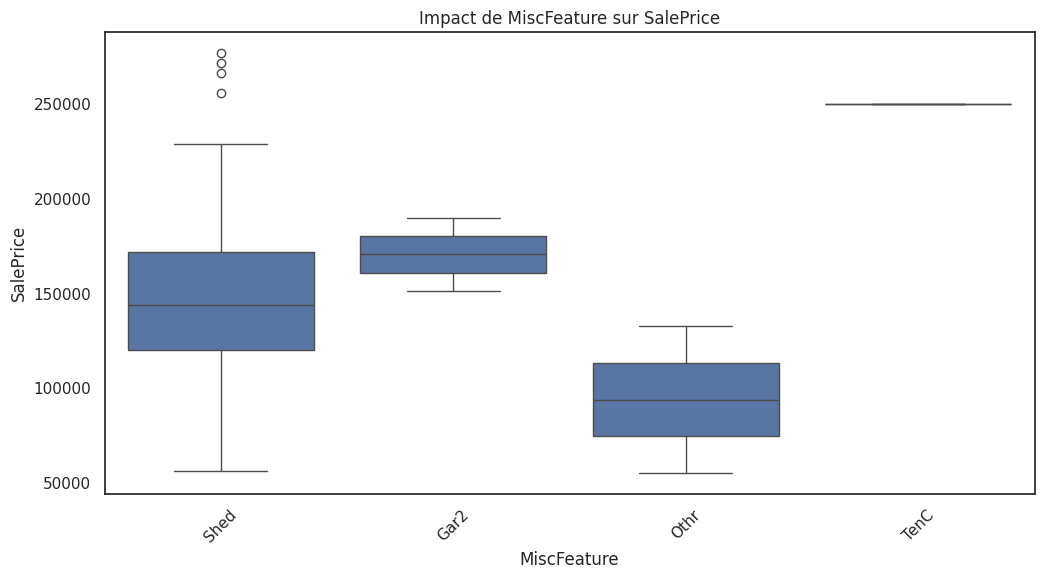

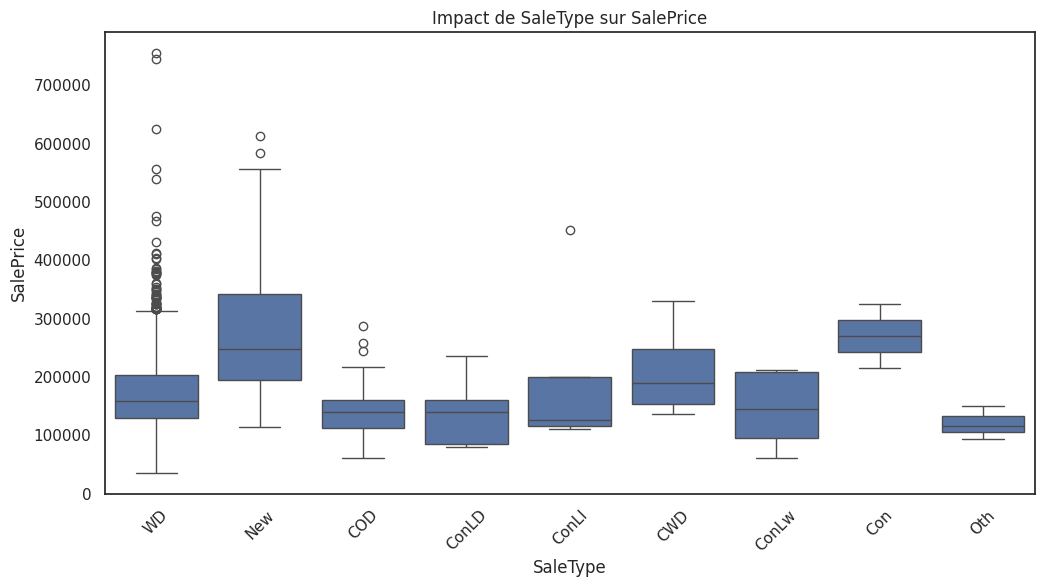

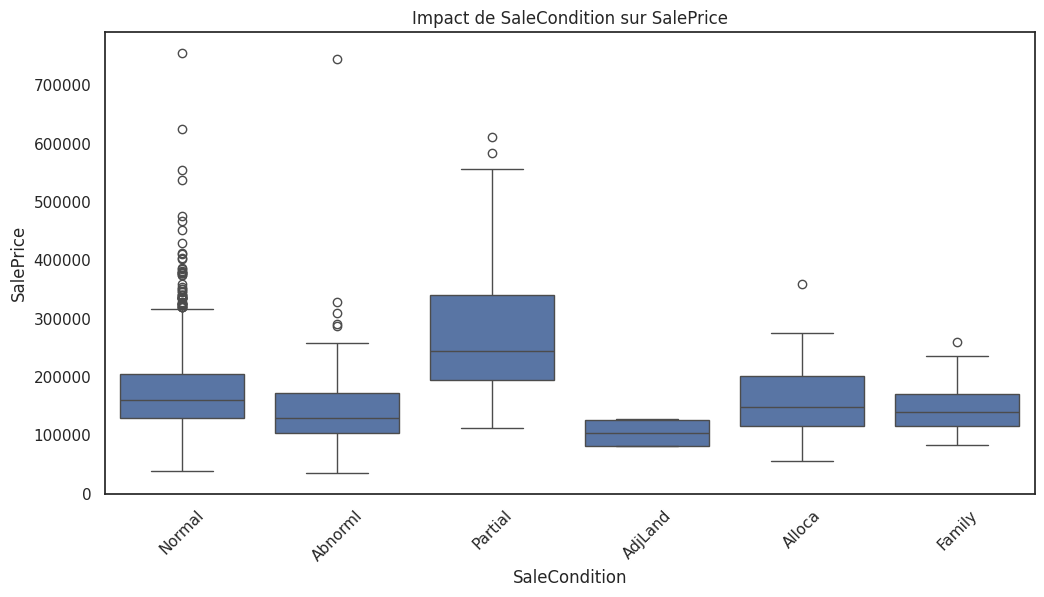

In [ ]:
# on recherche les caracteristique categorielle qui inpacte le saleprice
for col, _ in colonne_categorielle_importante:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[col], y=df['SalePrice'])
    plt.title(f'Impact de {col} sur SalePrice')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Nous pouvons observer que certaines variables catégorielles ont un impact significatif sur SalePrice telles que Neighborhood,
# ExterQual, KitchenQual, GarageType, SaleCondition

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode().iloc[0])  # réaffecte la colonne
    else:
        df[col] = df[col].fillna(df[col].mean())

print("Valeurs manquantes restantes :", df.isnull().sum().sum())

Valeurs manquantes restantes : 0


In [ ]:
# Encodage des variables catégorielles par fréquence
df_encoded = df.copy()

# Pour chaque variable catégorielle
for col in colonne_categorielle:
    # Calculer les fréquences de chaque catégorie
    frequency_map = df[col].value_counts(normalize=True)

    # Remplacer les catégories par leurs fréquences
    df_encoded[col] = df[col].map(frequency_map)

print("Forme après encodage par fréquence:", df_encoded.shape)

Forme après encodage par fréquence: (1460, 90)


In [ ]:

# Séparation entre les variables explicatives (X) et la variable cible (y)
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']

# Division en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

print("Taille du jeu d'entraînement :", X_train.shape)
print("Taille du jeu de test :", X_test.shape)


Taille du jeu d'entraînement : (1168, 89)
Taille du jeu de test : (292, 89)


In [ ]:
# Pipeline de prétraitement
pretraitement_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),       # Imputation des valeurs manquantes
    ('scaler', StandardScaler())                       # Standardisation des variables
])

# Application du pipeline
X_train_pretraitement = pretraitement_pipeline.fit_transform(X_train)
X_test_pretraitement = pretraitement_pipeline.transform(X_test)

In [ ]:
models = {
    "Régression Linéaire": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=SEED),
    "XGBoost": XGBRegressor(n_estimators=200, random_state=SEED),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=SEED)
}

# Réduction de dimensionnalité avec PCA

In [ ]:
# Réduction de dimensionnalité avec PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=SEED)  # Conserve 95% de la variance
X_train_pca = pca.fit_transform(X_train_pretraitement)
X_test_pca = pca.transform(X_test_pretraitement)

print("Nombre de composantes principales :", pca.n_components_)

Nombre de composantes principales : 60


In [ ]:
# Dictionnaire pour stocker les scores
results = []

print("Entraînement et validation croisée des modèles...\n")

for name, model in models.items():
    # Validation croisée avec scoring sur R² (coefficient de détermination)
    scores = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='r2')

    # Entraînement complet sur l'ensemble d'entraînement
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    # Calcul des métriques
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Stockage des résultats
    results.append({
        "Modèle": name,
        "R² CV (moyen)": scores.mean(),
        "R² Test": r2,
        "MAE": mae,
        "RMSE": rmse
    })

    print(f"{name} terminé")

# Conversion en DataFrame pour affichage clair
results_df = pd.DataFrame(results).sort_values(by="R² Test")
print("\nRésultats comparatifs des modèles :\n")
print(results_df)


Entraînement et validation croisée des modèles...

Régression Linéaire terminé
Ridge terminé


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.885e+10, tolerance: 5.256e+08
  model = cd_fast.enet_coordinate_descent(


Lasso terminé
Elastic Net terminé
Random Forest terminé
XGBoost terminé
Gradient Boosting terminé

Résultats comparatifs des modèles :

                Modèle  R² CV (moyen)   R² Test           MAE          RMSE
0  Régression Linéaire       0.492502  0.830944  22456.866851  36009.878906
2                Lasso       0.494746  0.830945  22456.756196  36009.786839
1                Ridge       0.610243  0.830964  22453.203957  36007.754451
3          Elastic Net       0.783559  0.831881  22259.992486  35909.962029
5              XGBoost       0.828690  0.855952  18401.244141  33239.910469
4        Random Forest       0.840429  0.868239  17857.634366  31790.678260
6    Gradient Boosting       0.848795  0.870985  17976.332137  31457.725973


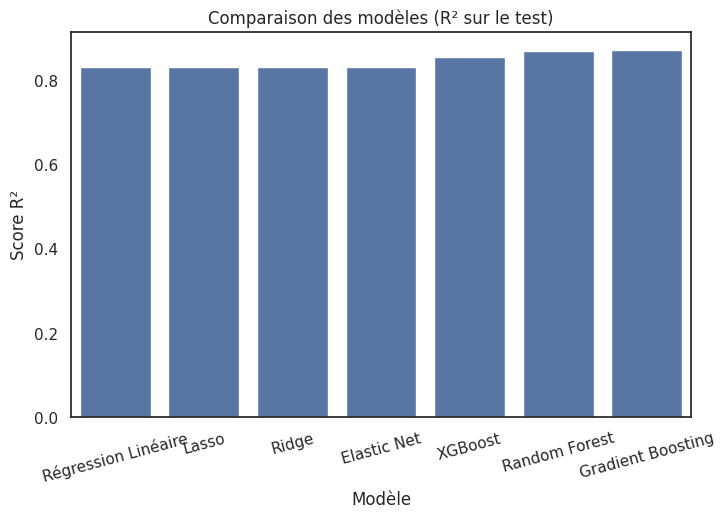

In [ ]:
# Visualisation des performances R²
plt.figure(figsize=(8,5))
sns.barplot(x=results_df["Modèle"], y=results_df["R² Test"])
plt.title("Comparaison des modèles (R² sur le test)")
plt.ylabel("Score R²")
plt.xticks(rotation=15)
plt.show()

In [ ]:
# Prédiction finale pour les 10 premiers exemples
best_model = GradientBoostingRegressor(n_estimators=200, random_state=42)
best_model.fit(X_train_scaled, y_train)

examples = X_test.iloc[:10]
predicted_prices = best_model.predict(scaler.transform(examples))

for i in range(10):
    print(f"Exemple {i+1} - Prix réel : {y_test.iloc[i]}, Prix prédit : {round(predicted_prices[i], 2)}")

Exemple 1 - Prix réel : 154500, Prix prédit : 143700.0
Exemple 2 - Prix réel : 325000, Prix prédit : 352380.21
Exemple 3 - Prix réel : 115000, Prix prédit : 111934.08
Exemple 4 - Prix réel : 159000, Prix prédit : 147928.55
Exemple 5 - Prix réel : 315500, Prix prédit : 347705.74
Exemple 6 - Prix réel : 75500, Prix prédit : 81730.57
Exemple 7 - Prix réel : 311500, Prix prédit : 217685.28
Exemple 8 - Prix réel : 146000, Prix prédit : 143049.79
Exemple 9 - Prix réel : 84500, Prix prédit : 69973.32
Exemple 10 - Prix réel : 135500, Prix prédit : 139739.94


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


# Avec SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score

scores = []
for k in range(5, X_train_scaled.shape[1]+1, 5):  # test de k de 5 à max, par pas de 5
    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_kbest = selector.fit_transform(X_train_pretraitement, y_train)
    X_test_kbest = selector.transform(X_test_pretraitement)

    model = GradientBoostingRegressor(n_estimators=200, random_state=SEED)
    model.fit(X_train_kbest, y_train)
    y_pred = model.predict(X_test_kbest)
    r2 = r2_score(y_test, y_pred)
    scores.append((k, r2))

# Affichage des scores pour chaque k
for k, r2 in scores:
    print(f"k={k} => Score R² : {r2:.4f}")

k=5 => Score R² : 0.8838
k=10 => Score R² : 0.8854
k=15 => Score R² : 0.8736
k=20 => Score R² : 0.8764
k=25 => Score R² : 0.8768
k=30 => Score R² : 0.8897
k=35 => Score R² : 0.8913
k=40 => Score R² : 0.8937
k=45 => Score R² : 0.8929
k=50 => Score R² : 0.9044
k=55 => Score R² : 0.9084
k=60 => Score R² : 0.9111
k=65 => Score R² : 0.9119
k=70 => Score R² : 0.9071
k=75 => Score R² : 0.9116
k=80 => Score R² : 0.9055
k=85 => Score R² : 0.9028


In [ ]:
# Trouve le k avec le meilleur score R²
best_k, best_r2 = max(scores, key=lambda x: x[1])
print(f"Meilleur k = {best_k} avec R² = {best_r2:.4f}")

Meilleur k = 65 avec R² = 0.9119


In [ ]:
# Sélection des meilleures variables
selector = SelectKBest(score_func=f_regression, k=best_k)
X_train_kbest = selector.fit_transform(X_train_pretraitement, y_train)
X_test_kbest = selector.transform(X_test_pretraitement)

# Entraînement du modèle final
final_model = GradientBoostingRegressor(n_estimators=200, random_state=SEED)
final_model.fit(X_train_kbest, y_train)

# Prédictions finales
y_pred_final = final_model.predict(X_test_kbest)

In [ ]:
mae = mean_absolute_error(y_test, y_pred_final)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2 = r2_score(y_test, y_pred_final)

print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R² final : {r2:.4f}")

MAE : 16103.10
RMSE : 26002.39
R² final : 0.9119


In [ ]:
# Sélection des 10 premiers exemples
examples = X_test.iloc[:10]
true_prices = y_test.iloc[:10].reset_index(drop=True)

# Transformation avec le même scaler et SelectKBest
examples_scaled = scaler.transform(examples)
examples_kbest = selector.transform(examples_scaled)

# Prédictions
predicted_prices = final_model.predict(examples_kbest)

# Affichage
print("Comparaison des prix réels et prédits :\n")
for i in range(10):
    erreur = abs(true_prices[i] - predicted_prices[i])
    print(f"Exemple {i+1} - Prix réel : {true_prices[i]}, Prix prédit : {round(predicted_prices[i], 2)} | Erreur : {round(erreur, 2)}")

Comparaison des prix réels et prédits :

Exemple 1 - Prix réel : 154500, Prix prédit : 142270.02 | Erreur : 12229.98
Exemple 2 - Prix réel : 325000, Prix prédit : 361118.17 | Erreur : 36118.17
Exemple 3 - Prix réel : 115000, Prix prédit : 112418.26 | Erreur : 2581.74
Exemple 4 - Prix réel : 159000, Prix prédit : 146140.79 | Erreur : 12859.21
Exemple 5 - Prix réel : 315500, Prix prédit : 326558.7 | Erreur : 11058.7
Exemple 6 - Prix réel : 75500, Prix prédit : 73421.15 | Erreur : 2078.85
Exemple 7 - Prix réel : 311500, Prix prédit : 219845.12 | Erreur : 91654.88
Exemple 8 - Prix réel : 146000, Prix prédit : 147781.84 | Erreur : 1781.84
Exemple 9 - Prix réel : 84500, Prix prédit : 73325.14 | Erreur : 11174.86
Exemple 10 - Prix réel : 135500, Prix prédit : 136063.17 | Erreur : 563.17


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


# Hyperparametre Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Paramètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Modèle + recherche
grid = GridSearchCV(GradientBoostingRegressor(random_state=SEED), param_grid, cv=5, scoring='r2')
grid.fit(X_train_kbest, y_train)

print("Meilleurs paramètres :", grid.best_params_)
best_model = grid.best_estimator_

Meilleurs paramètres : {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
# Prédictions finales
y_pred_final = best_model.predict(X_test_kbest)

In [ ]:
mae = mean_absolute_error(y_test, y_pred_final)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2 = r2_score(y_test, y_pred_final)

print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R² final : {r2:.4f}")

MAE : 16084.33
RMSE : 27197.79
R² final : 0.9036


In [ ]:
# Comparaison des 10 premiers exemples
print("\nComparaison des prix réels et prédits :\n")
for i in range(10):
    erreur = abs(y_test.iloc[i] - y_pred_final[i])
    print(f"Exemple {i+1} - Prix réel : {y_test.iloc[i]}, Prix prédit : {round(y_pred_final[i], 2)} | Erreur : {round(erreur, 2)}")


Comparaison des prix réels et prédits :

Exemple 1 - Prix réel : 154500, Prix prédit : 140048.55 | Erreur : 14451.45
Exemple 2 - Prix réel : 325000, Prix prédit : 345912.88 | Erreur : 20912.88
Exemple 3 - Prix réel : 115000, Prix prédit : 101644.54 | Erreur : 13355.46
Exemple 4 - Prix réel : 159000, Prix prédit : 145643.96 | Erreur : 13356.04
Exemple 5 - Prix réel : 315500, Prix prédit : 324590.32 | Erreur : 9090.32
Exemple 6 - Prix réel : 75500, Prix prédit : 77165.52 | Erreur : 1665.52
Exemple 7 - Prix réel : 311500, Prix prédit : 223489.65 | Erreur : 88010.35
Exemple 8 - Prix réel : 146000, Prix prédit : 148745.35 | Erreur : 2745.35
Exemple 9 - Prix réel : 84500, Prix prédit : 75428.82 | Erreur : 9071.18
Exemple 10 - Prix réel : 135500, Prix prédit : 136743.44 | Erreur : 1243.44


# Sauvegarde du modele

In [ ]:
# Sauvegarde du modèle
import joblib

joblib.dump(best_model, "best_gradient_boosting_model.pkl")
print("Modèle Gradient Boosting sauvegardé sous : best_gradient_boosting_model.pkl")

# Justification :
# - Le modèle Gradient Boosting présente le meilleur R² moyen en validation croisée (CV=5).
# - Il offre un bon équilibre entre biais et variance.
# - Ses erreurs (RMSE, MAE) sont plus faibles que celles des modèles linéaires.
# - C’est donc le modèle le plus adapté pour la prédiction du prix de l’immobilier.


# Tester et comparer plusieurs modèles

Nous avons réalisé des tests sur sept modèles différents pour déterminer lequel était le meilleur. Après plusieurs tentatives, le modèle qui a obtenu les meilleurs résultats a été le Gradient Boosting, avec un score R2 de 0,91.
**Justification** : Le Gradient Boosting est une méthode d’apprentissage supervisé puissante qui construit un modèle robuste en corrigeant les erreurs de prédictions précédentes, étape par étape.

# Évaluer la performance

Pour l'évaluation des performances, nous avons choisi d'utiliser des métriques telles que le MAE, le RMSE et le R2, comme c'est le cas en régression.

# Optimiser au moins un ou deux modèle(s)

- Pour optimiser notre meilleur modèle, le Gradient Boosting, nous avons utilisé Grid Search. Après avoir trouvé les paramètres optimaux, nous avons réentraîné le modèle, atteignant un score R2 de 0,90, ce qui est mieux que le score de base de 0,87.

- Nous avons aussi utilisé un SelectKBest avec une boucle for pour trouver le meilleur k qui était 65 et nous avons fait l'entraînement notre modèle a eu un score bon qu'avec le Grid Search. Notre modèle avait un score R2 de 0.91.

# Conclusion

Comme conclusin nous avons pris le Gradient Boosting car il a un excellent compromis entre performance et interprétabilité, avec une stabilité remarquable et une capacité à généraliser sur des données complexes. C’est pourquoi nous  allons pris comme modèle final pour notre projet
